# SSD: Single Shot MultiBox Detector

This is designed to visualize score maps of trained model. Modified from 00-classification.ipynb.

### 1. Setup

* First, set up Python, `numpy`, and `matplotlib`.

In [1]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (14, 14)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels

* Load caffe

In [2]:
# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = '../../'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.

### 2. Load net and set up input preprocessing

* Set Caffe to GPU mode and load the net from disk.

In [3]:
caffe.set_device(0)
caffe.set_mode_cpu()

model_def = '../../models/SSD_300x300_add_conv9_2_conf_loss_all_train/test.prototxt'
model_weights = '../../models/SSD_300x300_add_conv9_2_conf_loss_all_train/VGG_VOC0712_SSD_300x300_iter_20000.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [4]:
### perform detection
output = net.forward()

* Since we're dealing with four-dimensional data here, we'll define a helper function for visualizing sets of rectangular heatmaps.

In [5]:
def vis_square(data, mode='gray'):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""

    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=0)  # pad with zeros (black)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    fig = plt.figure()
    plt.imshow(data, cmap=mode);
    plt.axis('off')

In [12]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

cls_names = ('background',
             'aeroplane', 'bicycle', 'bird', 'boat',
             'bottle', 'bus', 'car', 'cat', 'chair',
             'cow', 'diningtable', 'dog', 'horse',
             'motorbike', 'person', 'pottedplant',
             'sheep', 'sofa', 'train', 'tvmonitor')

def vis_score_map(data, title='score_maps', vis_mode='probs'):
    fig = plt.figure()
    if vis_mode == 'probs':
        probs = softmax(data)
    elif vis_mode == 'scores':
        probs = data.copy()
    for i in xrange(21):
        cur_score_map = probs[i, :]
        a = fig.add_subplot(6,4,i+1)
        if vis_mode == 'probs':
            imgplot = plt.imshow(cur_score_map, clim=(0.0, 1.0))
        elif vis_mode == 'scores':
            imgplot = plt.imshow(cur_score_map, clim=(-20.0, 20.0))
        a.set_title('{}: {}'.format(i, cls_names[i]))
        plt.colorbar()
        a.axis('on')
    plt.suptitle(title, fontsize=25)
    plt.subplots_adjust(wspace=0.1,hspace=0.3)

def show_score_maps(item_id):
    blob_name = 'data'
    cur_blob = net.blobs[blob_name].data[item_id]
    vis_square(cur_blob, 'gray')

    blob_name = 'conv4_3_norm_mbox_conf'
    cur_blob = net.blobs[blob_name].data[item_id][:21]
    vis_score_map(cur_blob, title=blob_name)

    blob_name = 'fc7_mbox_conf'
    cur_blob = net.blobs[blob_name].data[item_id][:21]
    vis_score_map(cur_blob, title=blob_name)

    blob_name = 'conv6_2_mbox_conf'
    cur_blob = net.blobs[blob_name].data[item_id][:21]
    vis_score_map(cur_blob, title=blob_name)

    blob_name = 'conv7_2_mbox_conf'
    cur_blob = net.blobs[blob_name].data[item_id][:21]
    vis_score_map(cur_blob, title=blob_name)

    blob_name = 'conv8_2_mbox_conf'
    cur_blob = net.blobs[blob_name].data[item_id][:21]
    vis_score_map(cur_blob, title=blob_name)

    blob_name = 'conv9_2_mbox_conf'
    cur_blob = net.blobs[blob_name].data[item_id][:21]
    vis_score_map(cur_blob, title=blob_name)
    
    blob_name = 'conv9_2_mbox_conf_global'
    cur_blob = net.blobs[blob_name].data[item_id][:21]
    vis_score_map(cur_blob, title=blob_name)

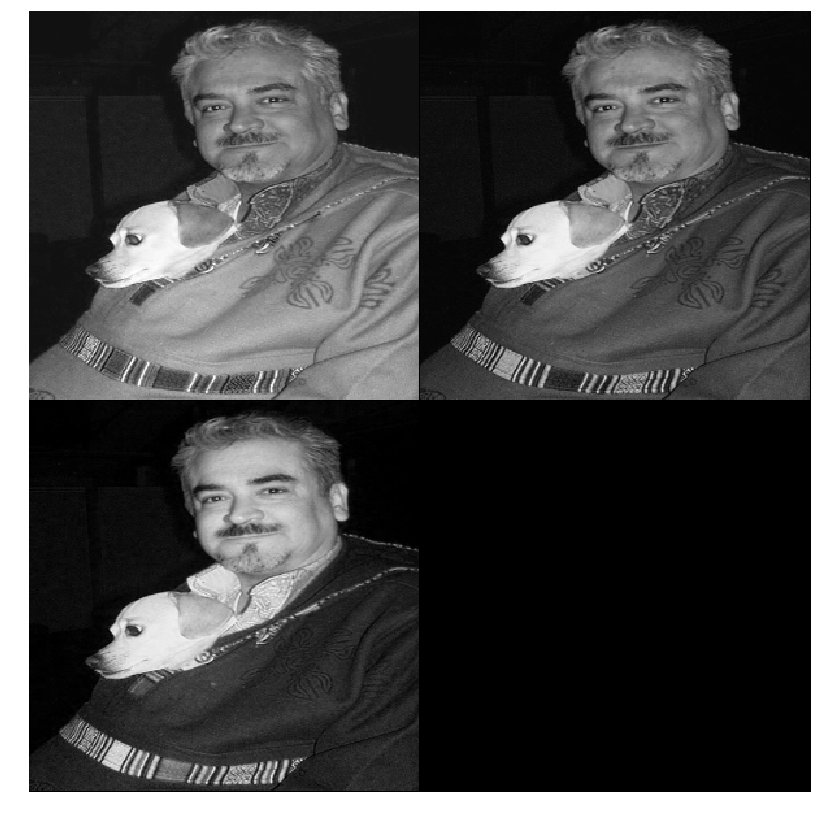

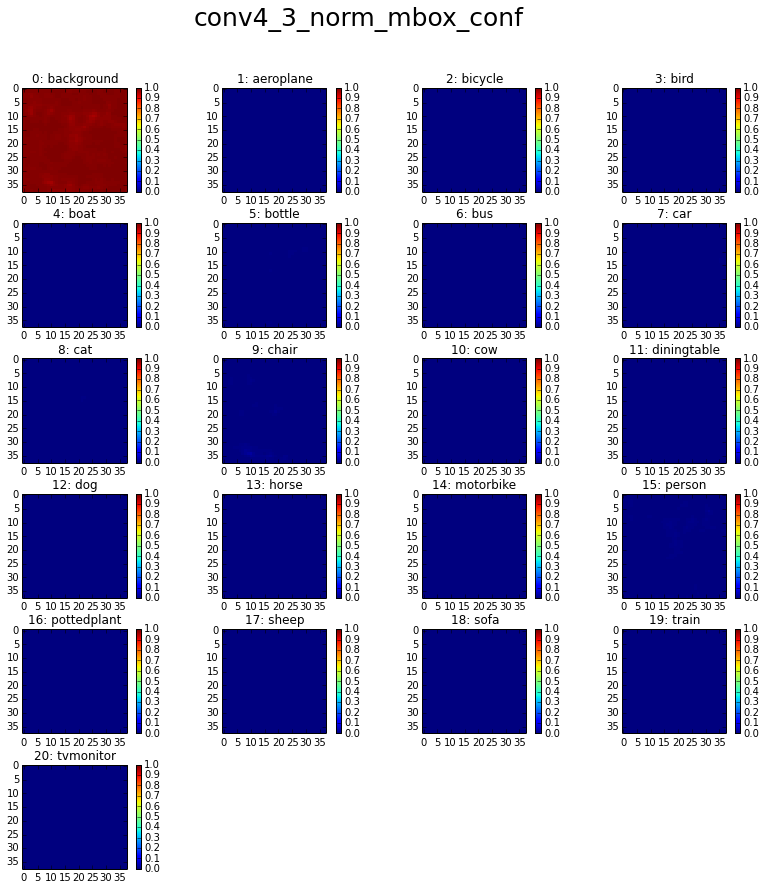

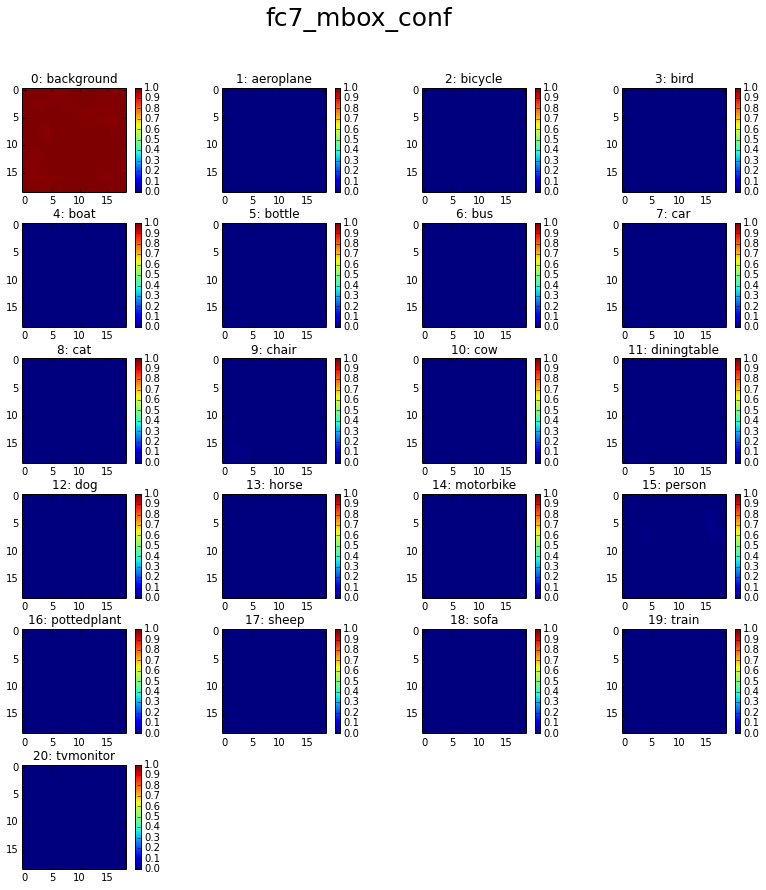

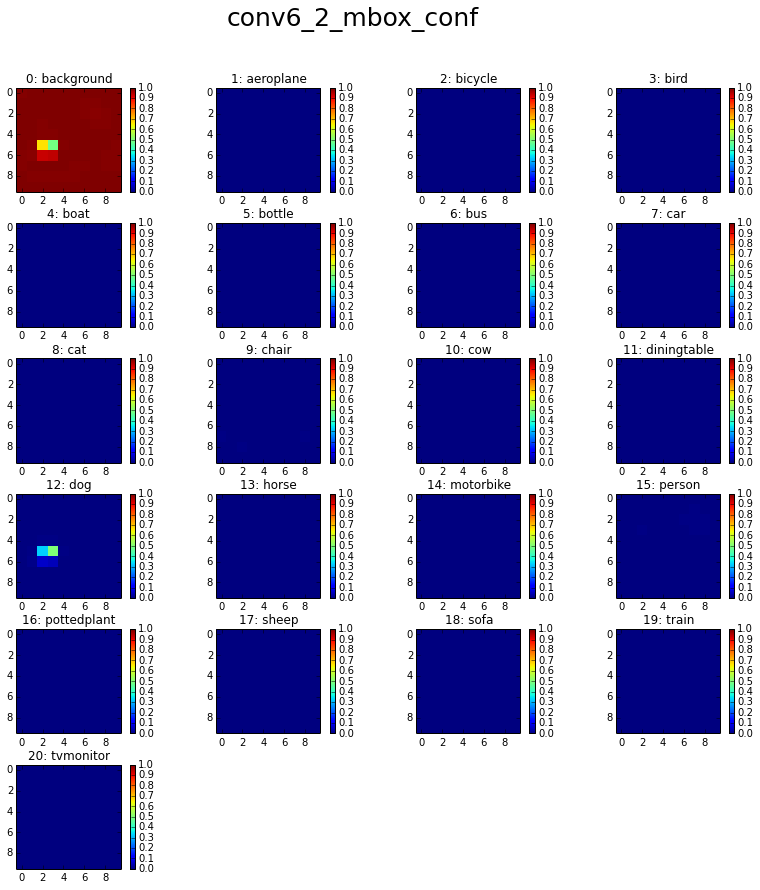

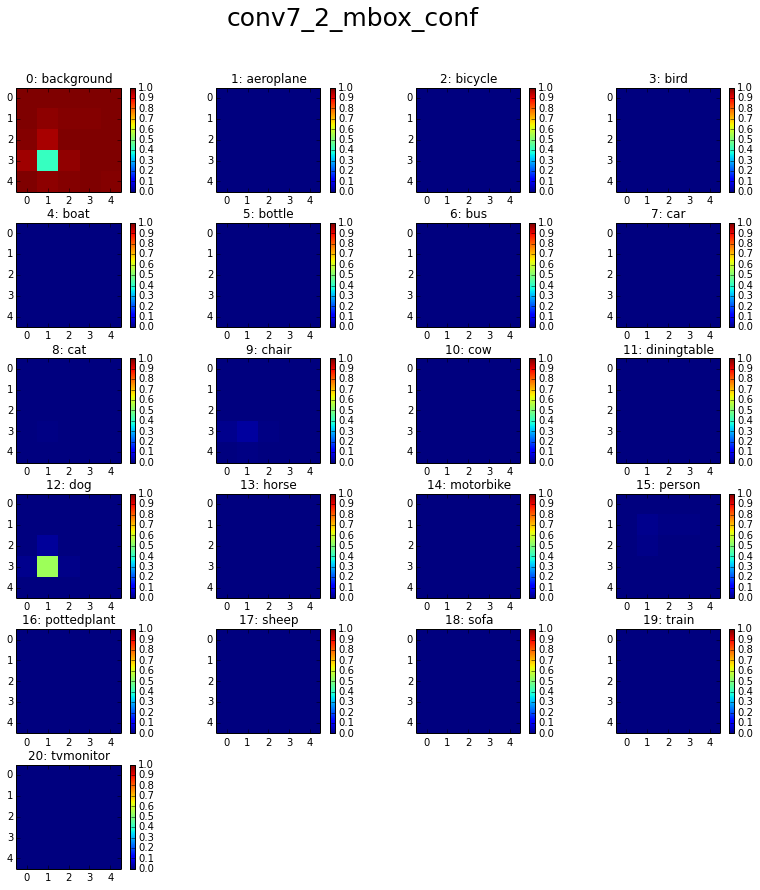

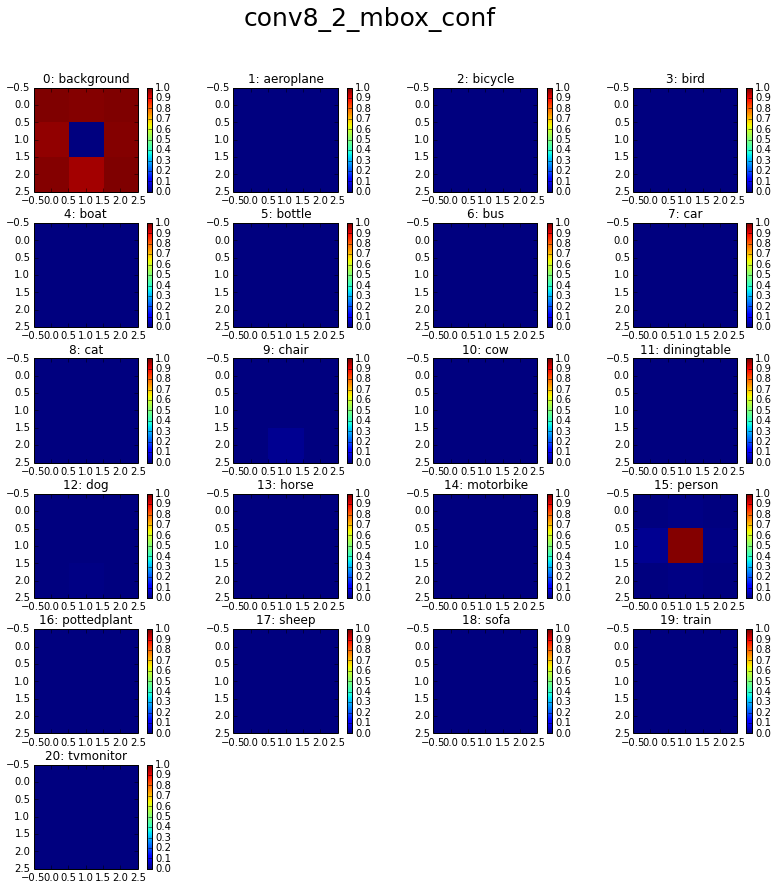

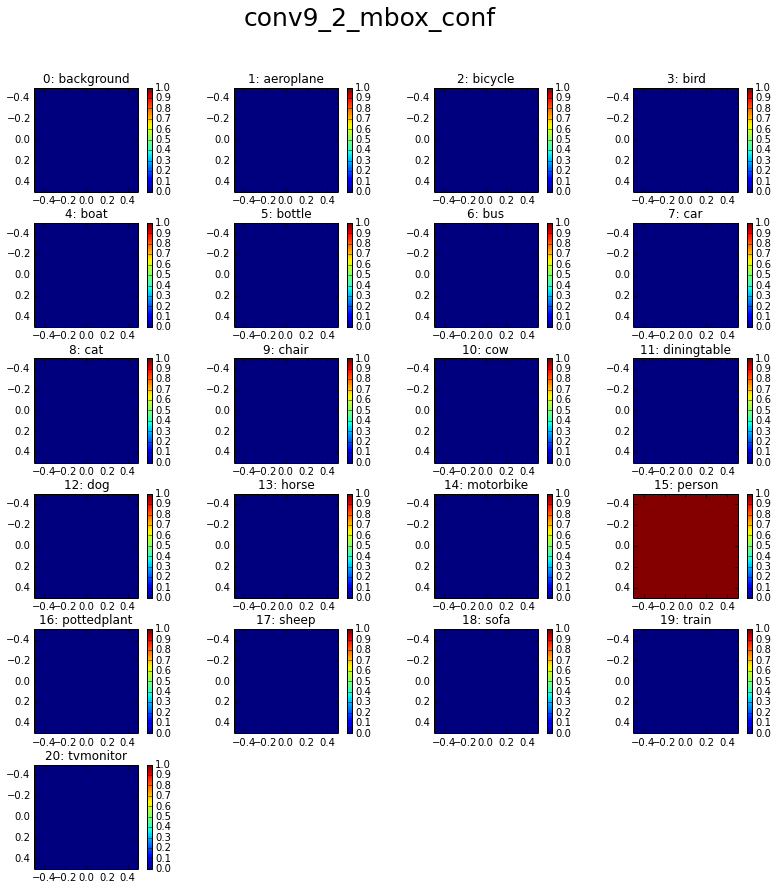

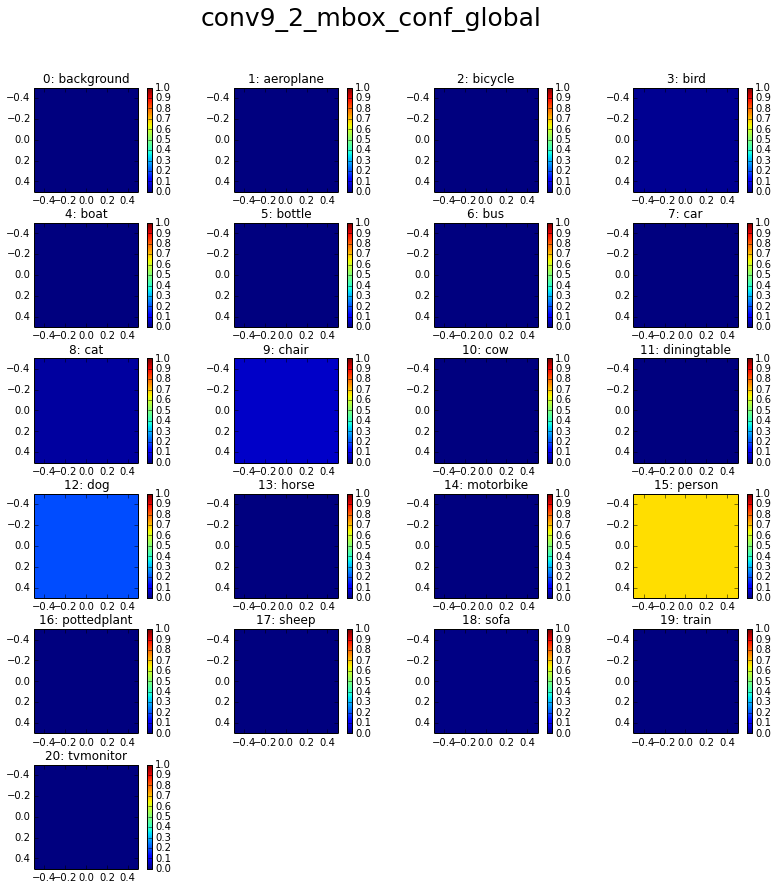

In [13]:
show_score_maps(0)

In [14]:
plt.close('all')

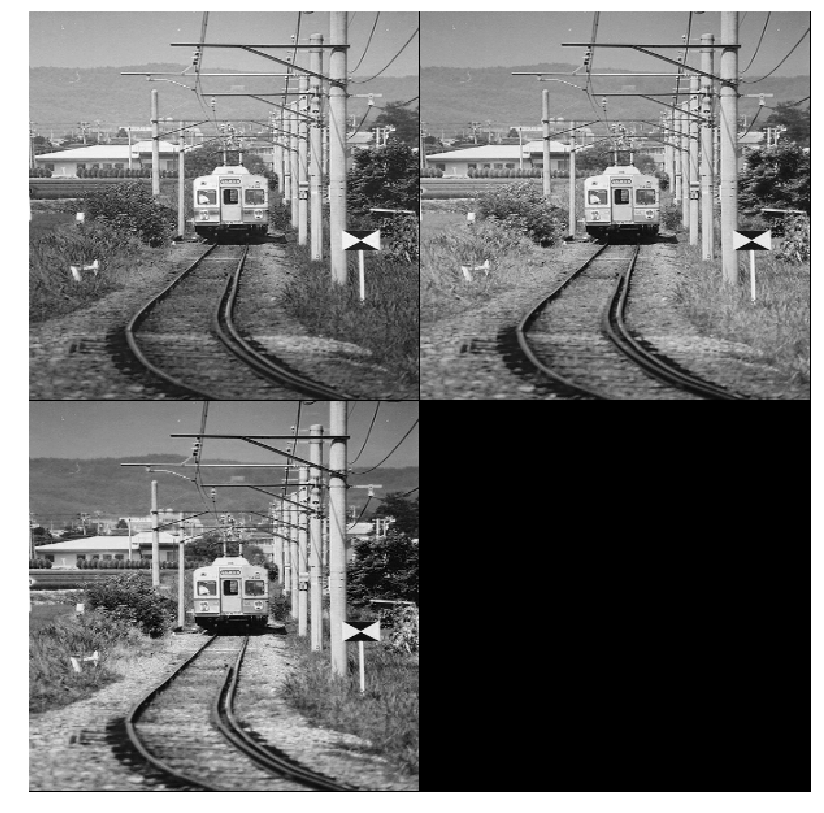

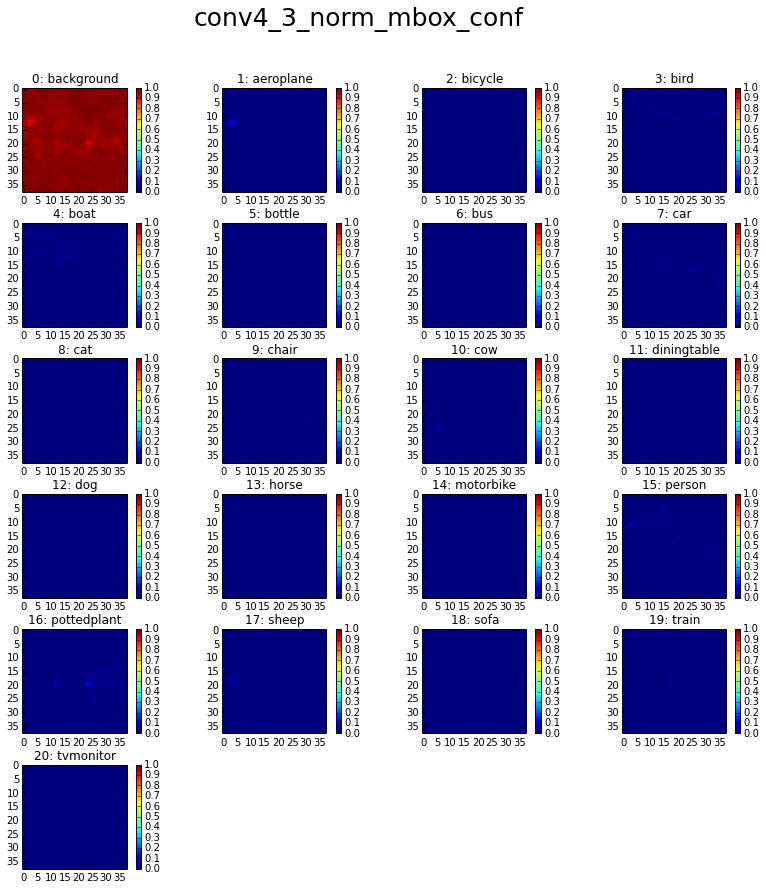

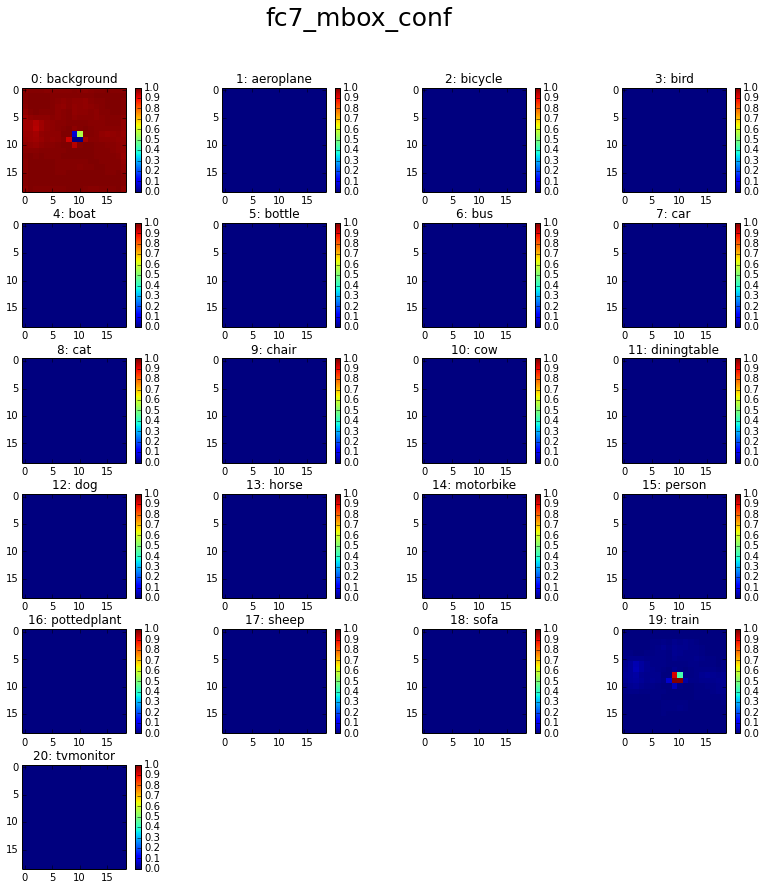

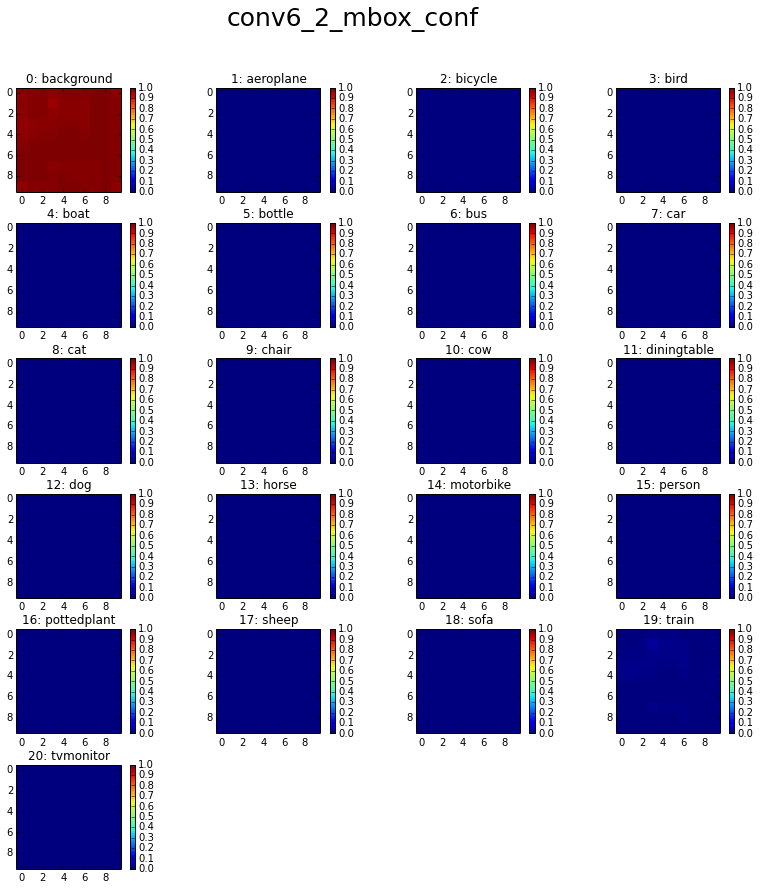

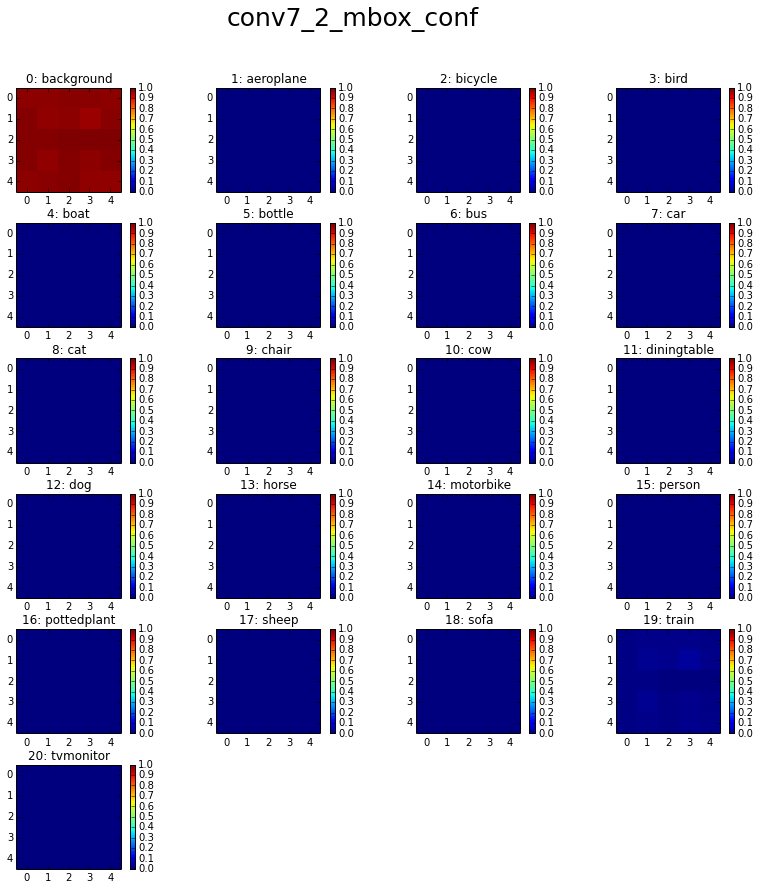

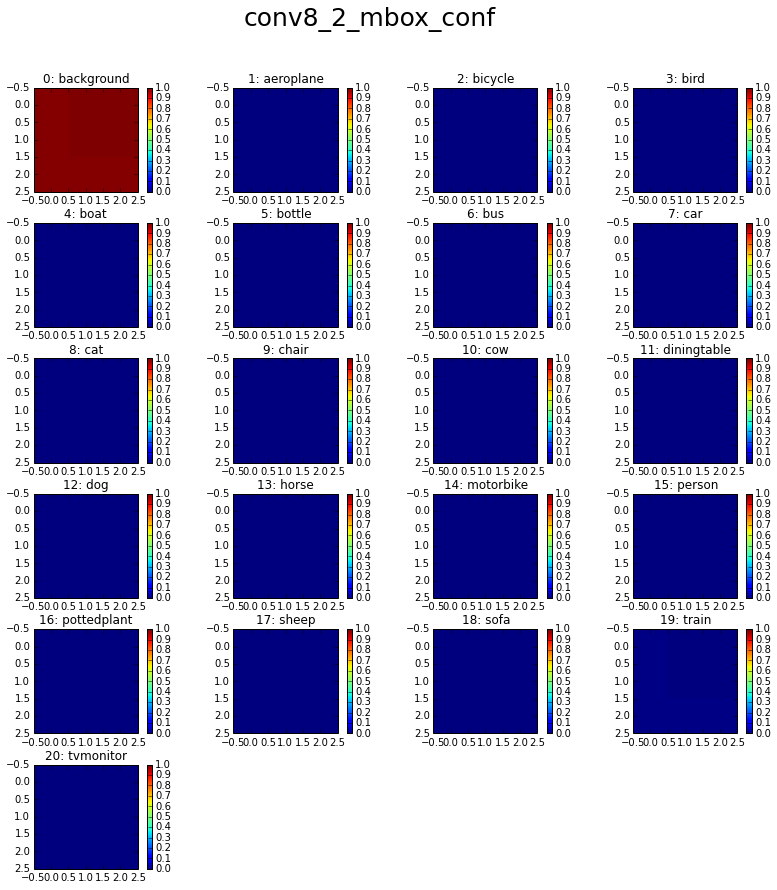

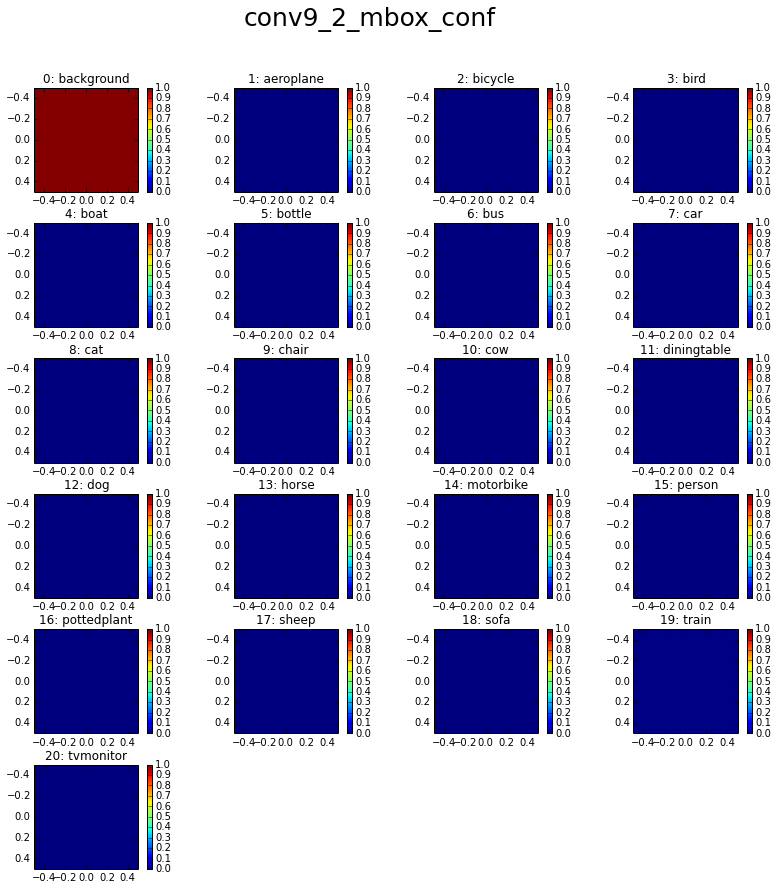

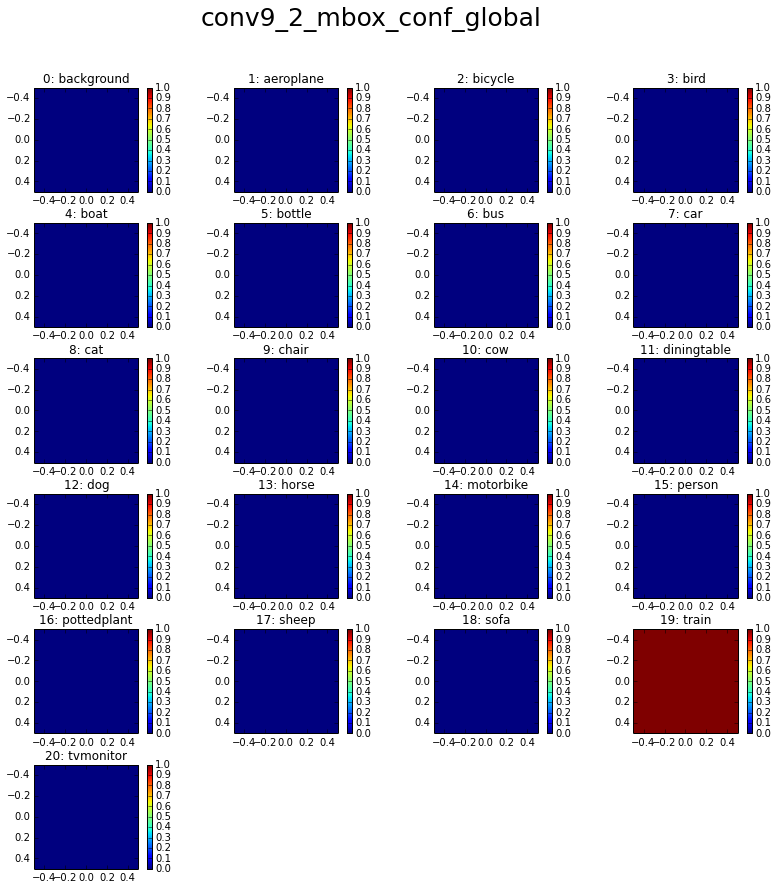

In [15]:
show_score_maps(1)

In [16]:
plt.close('all')

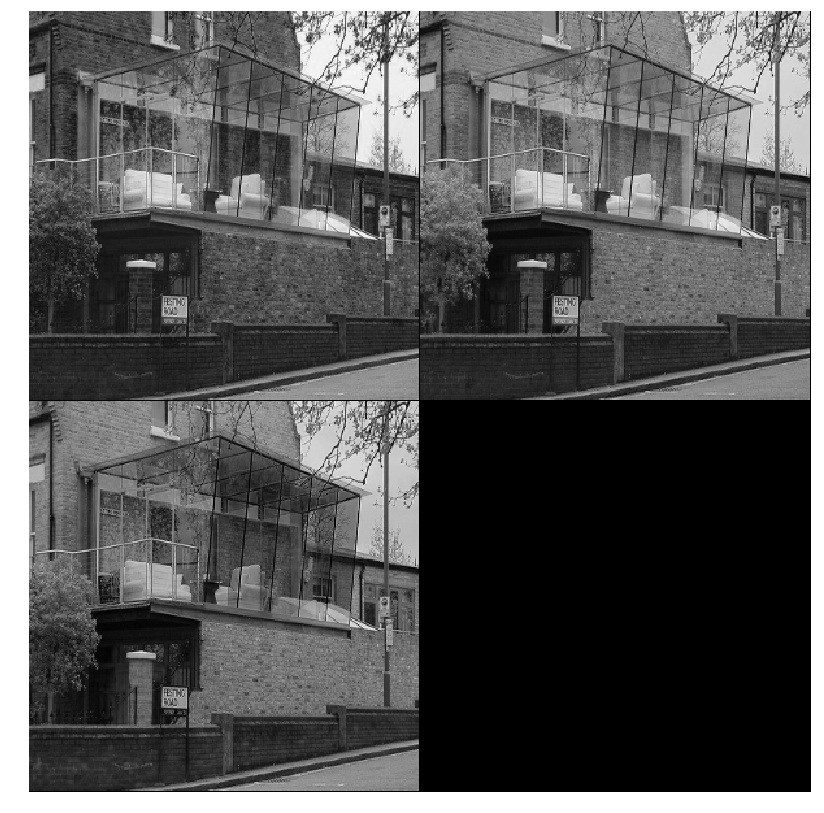

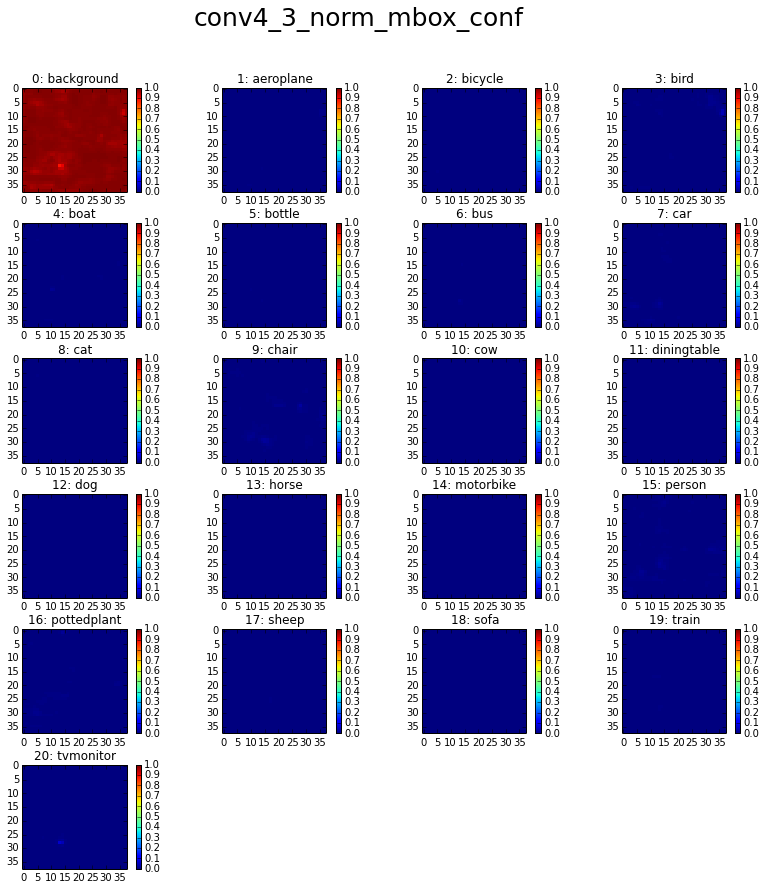

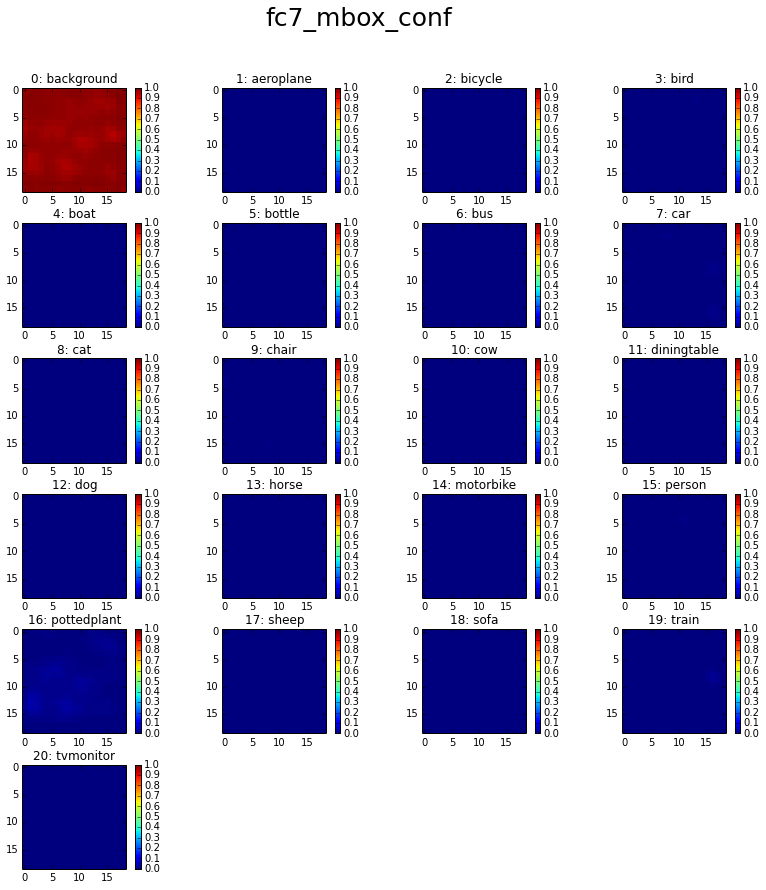

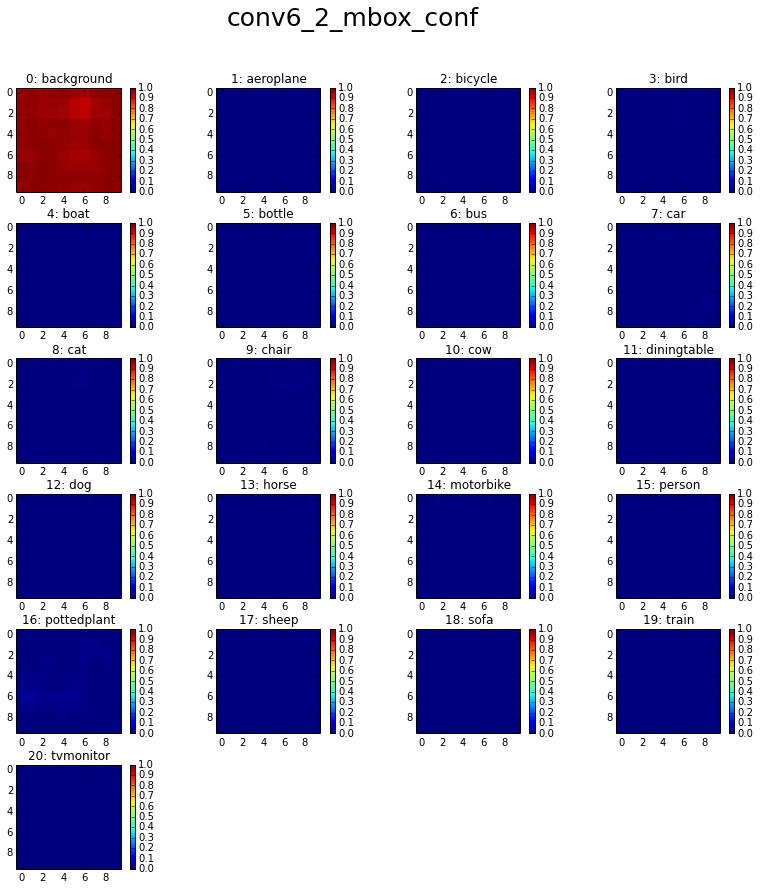

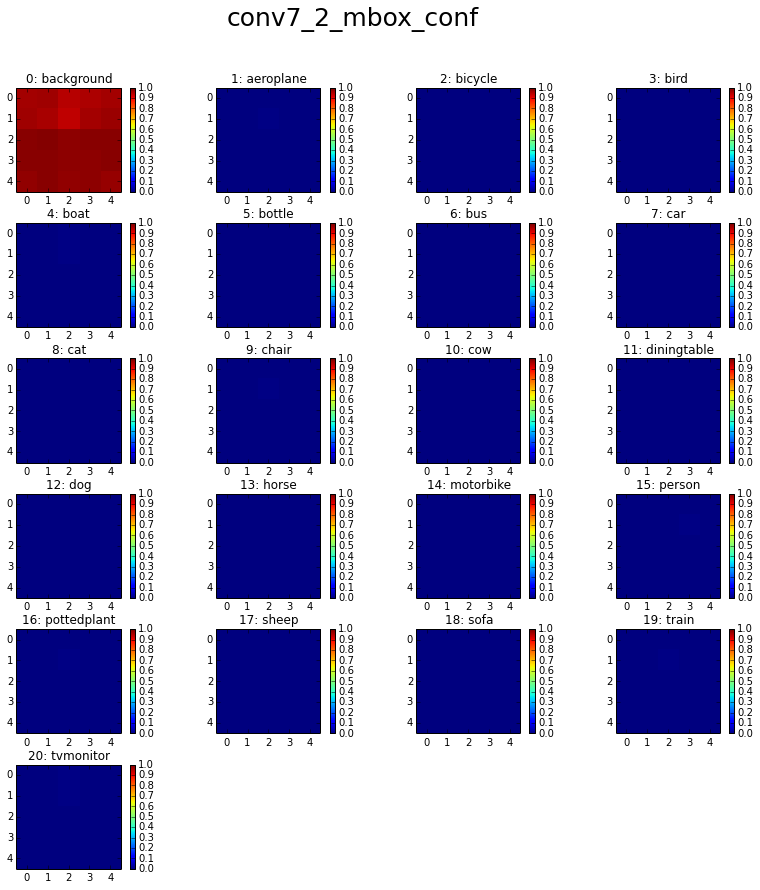

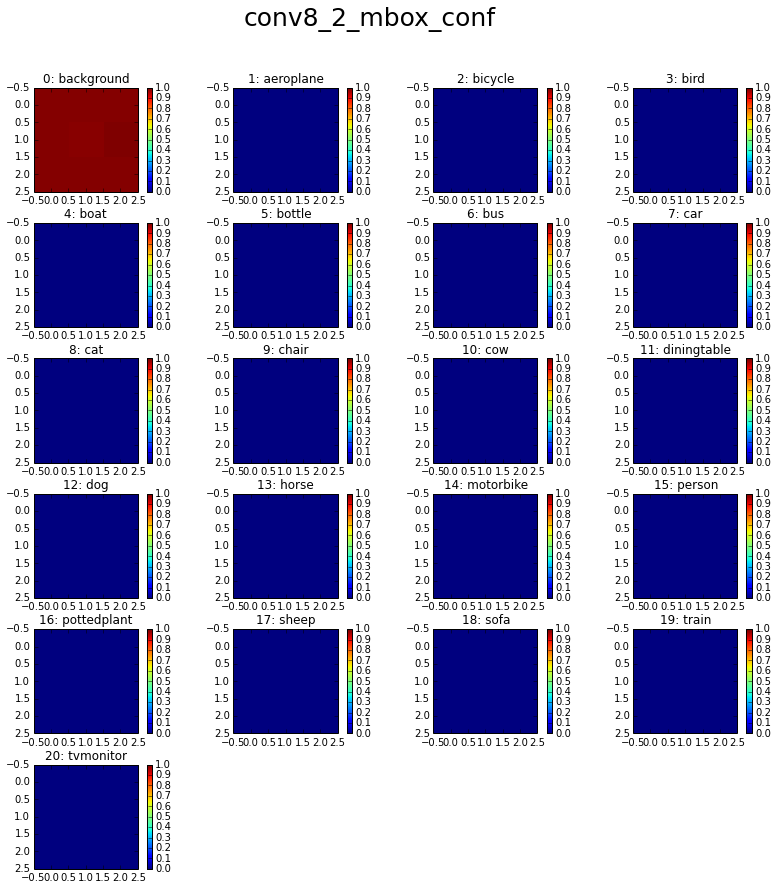

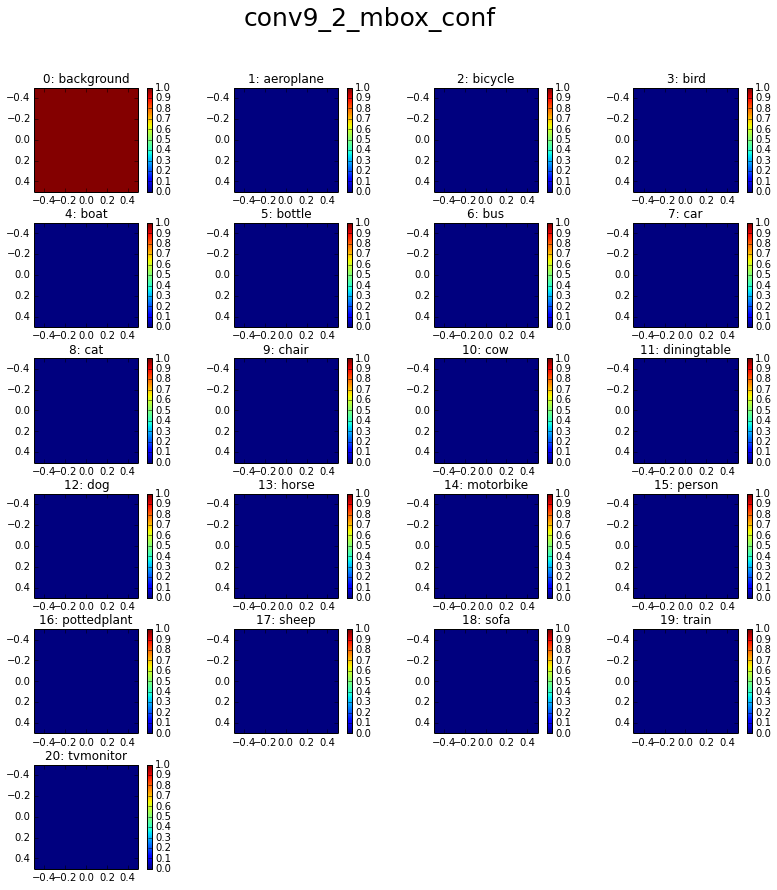

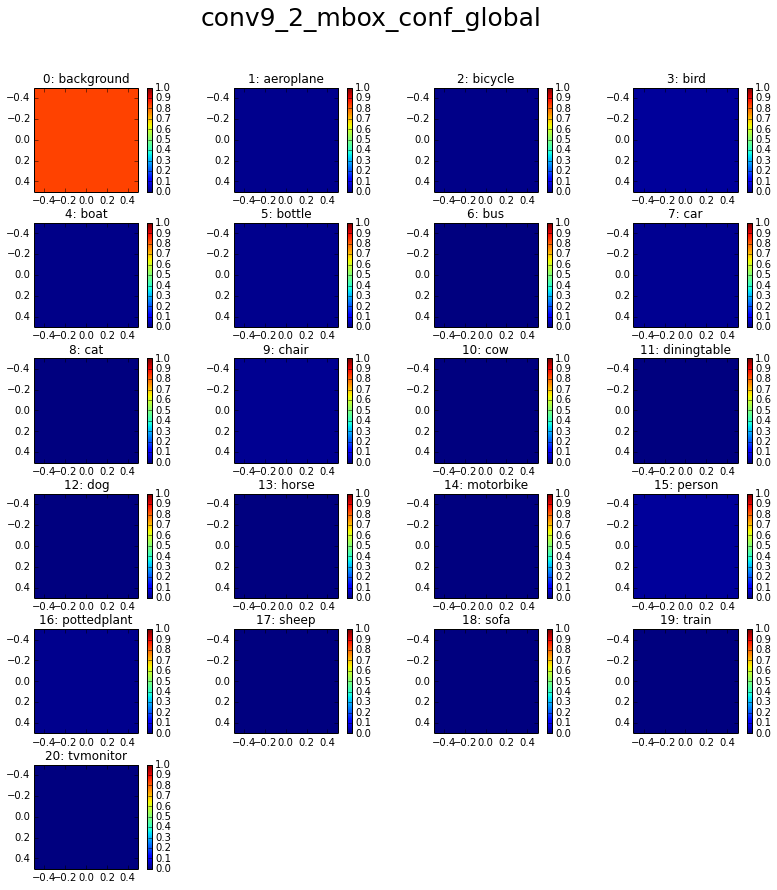

In [17]:
show_score_maps(2)

In [18]:
plt.close('all')

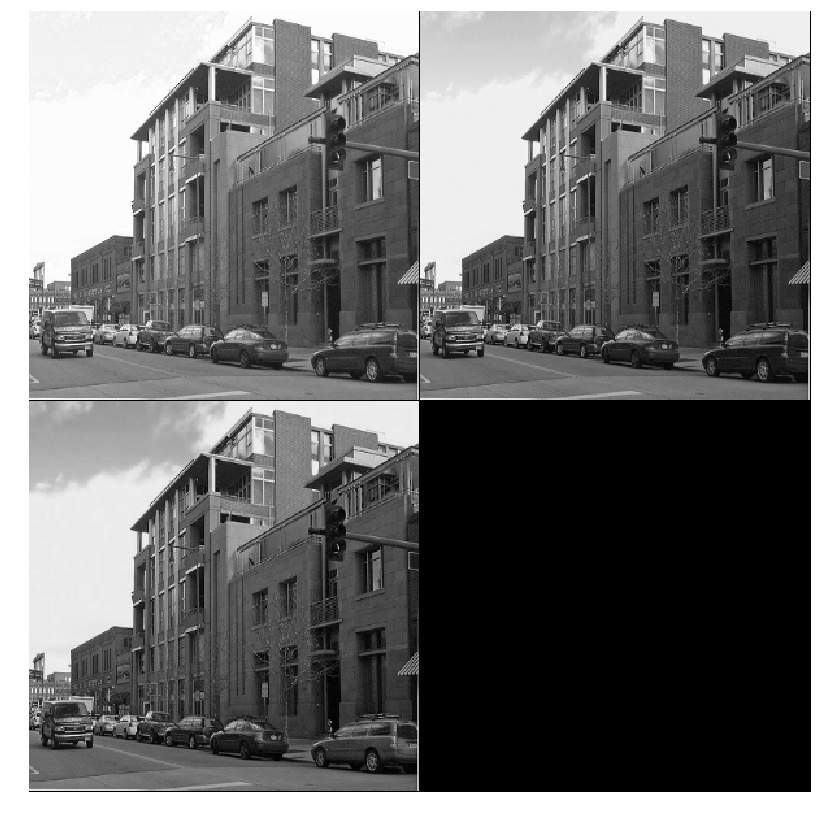

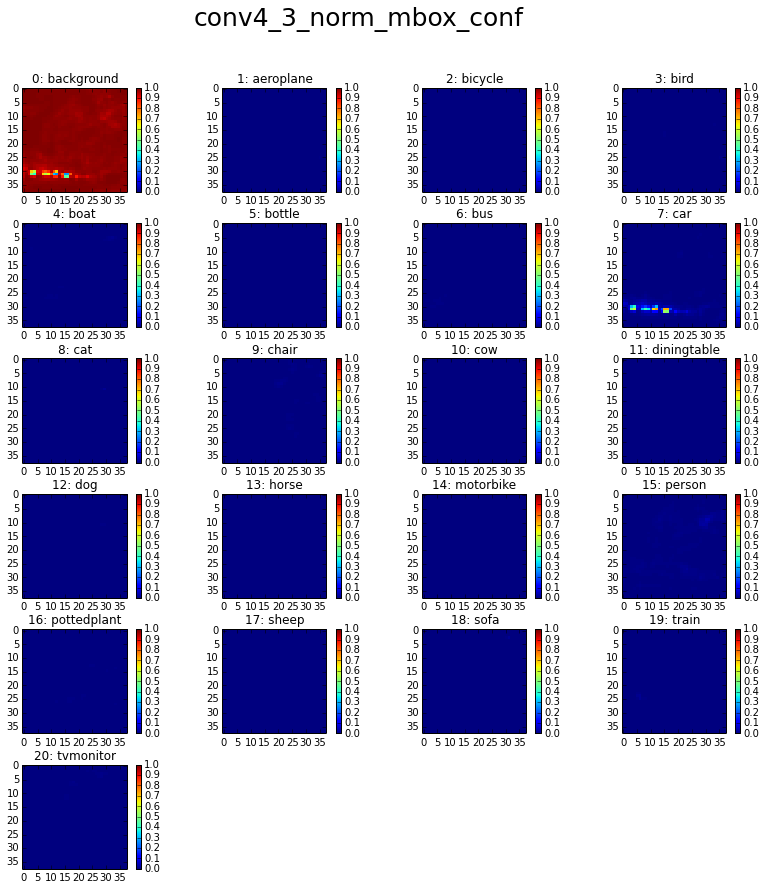

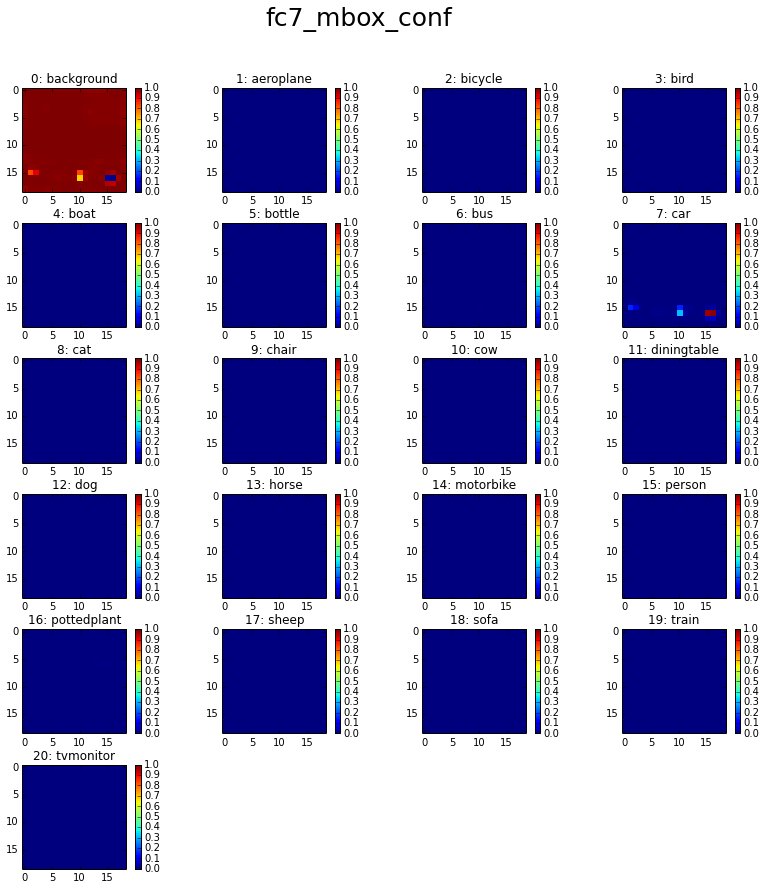

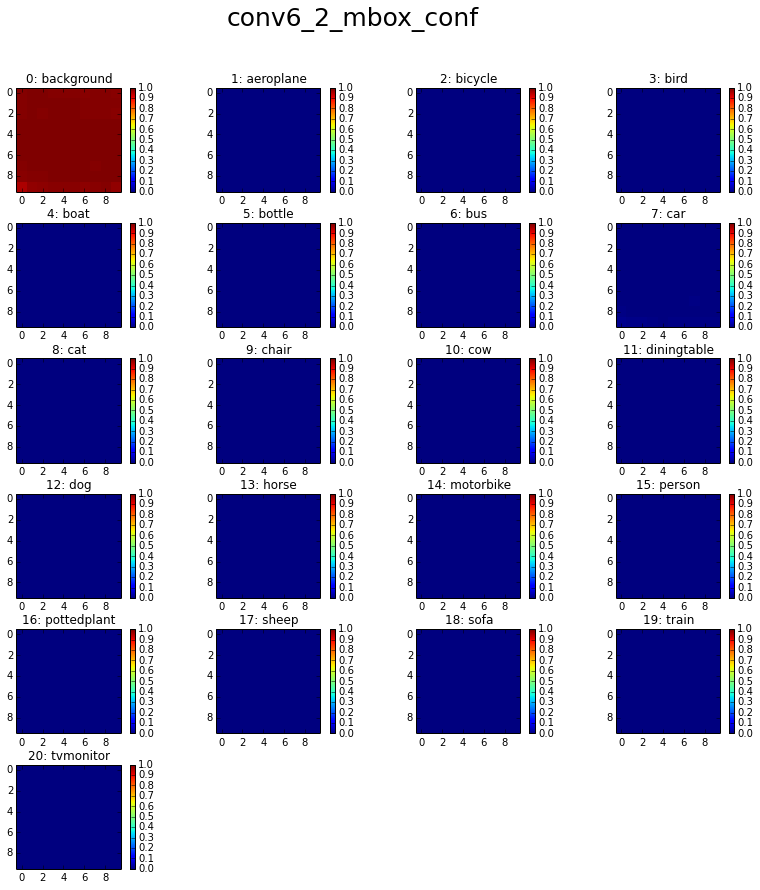

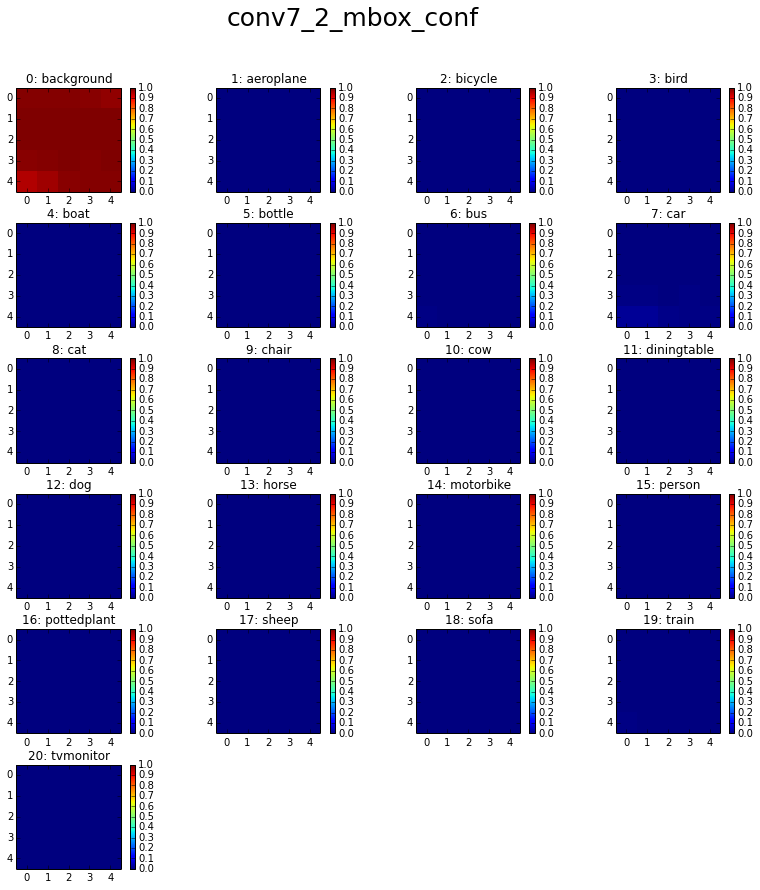

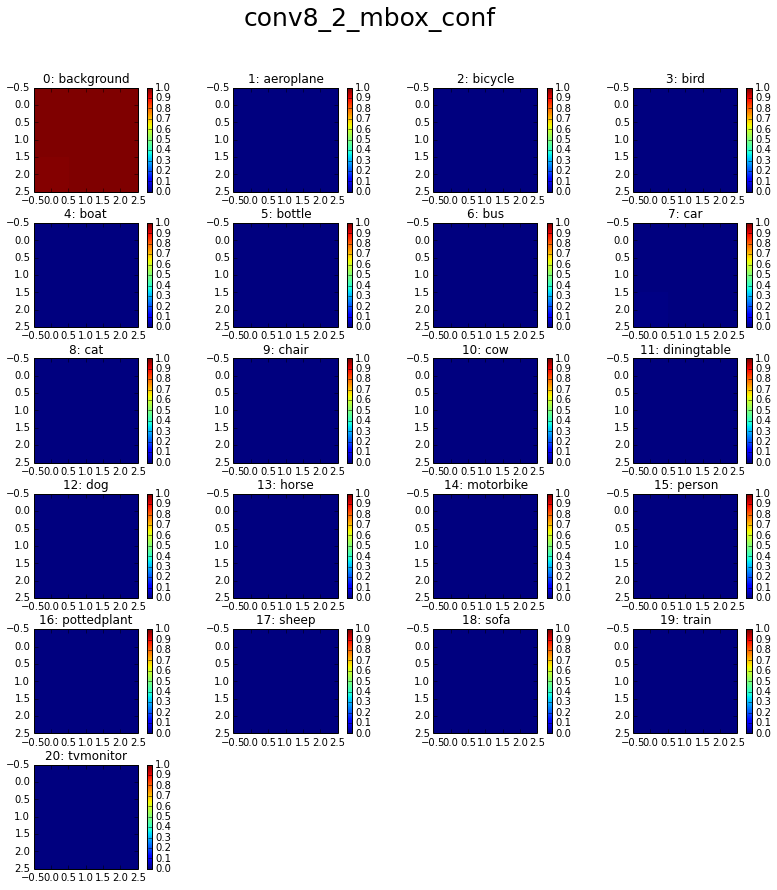

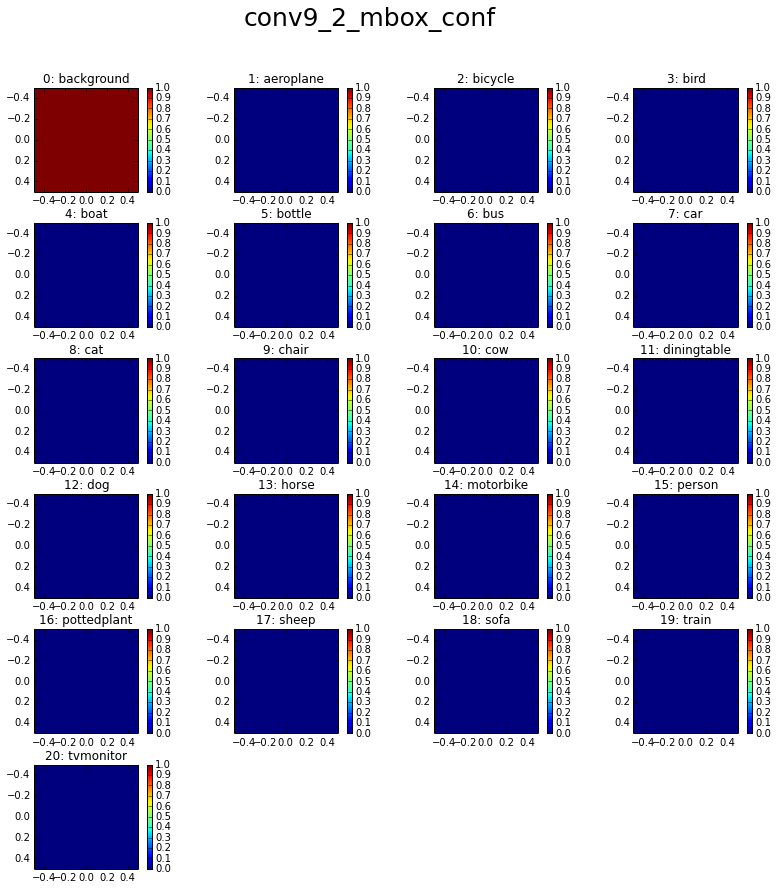

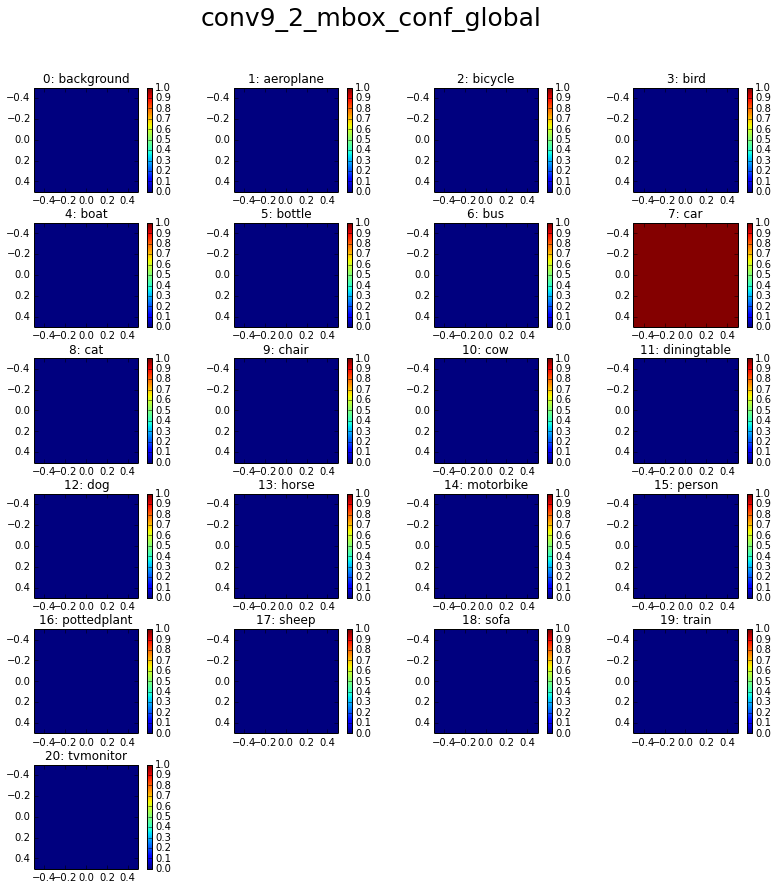

In [19]:
show_score_maps(3)

In [20]:
plt.close('all')

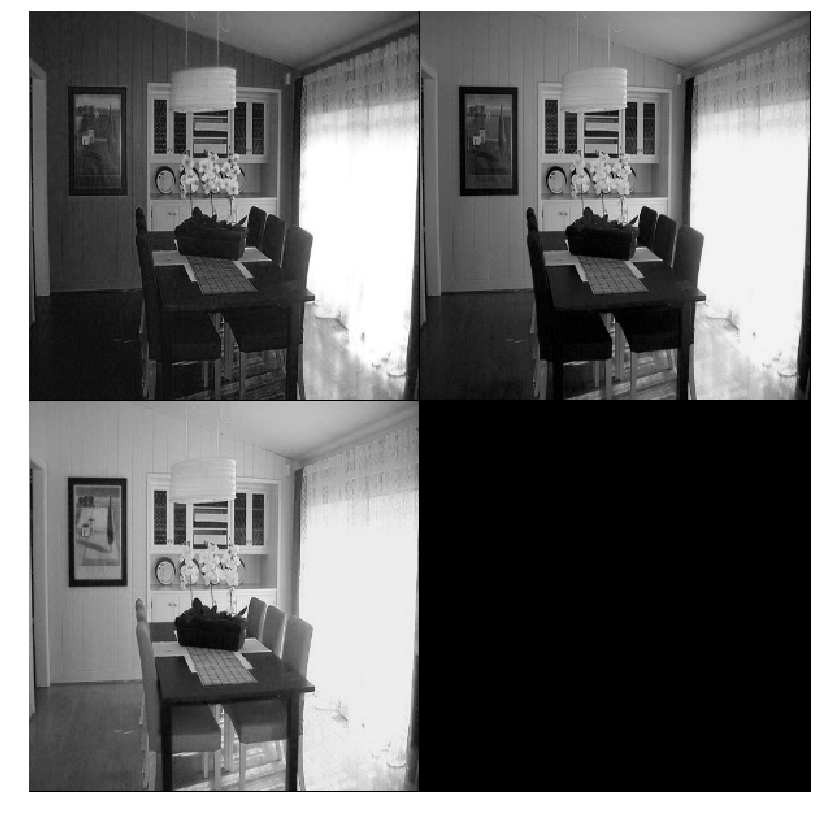

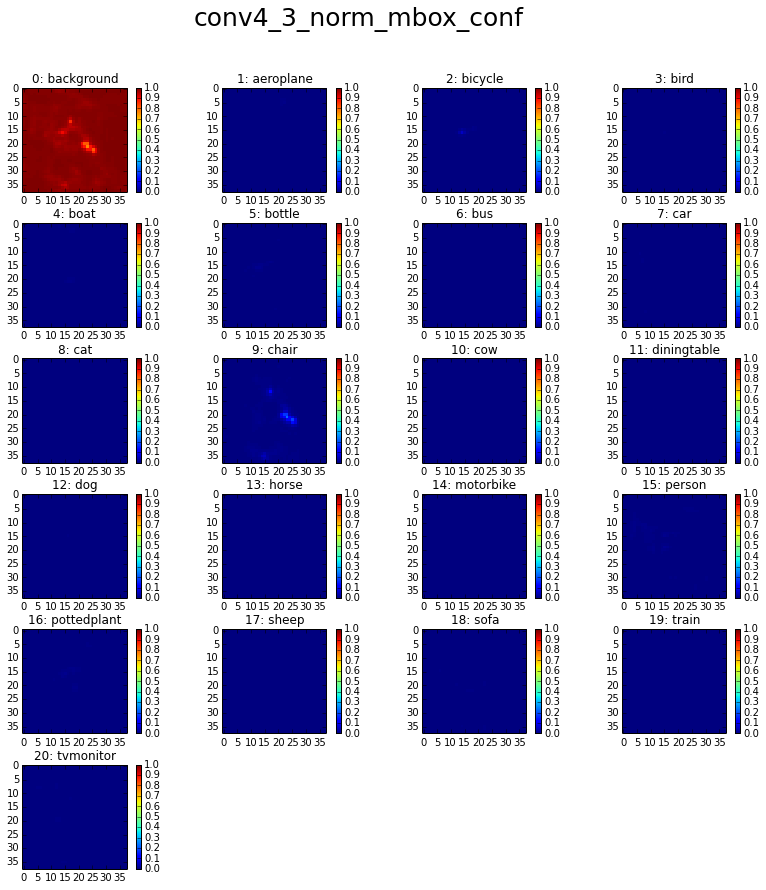

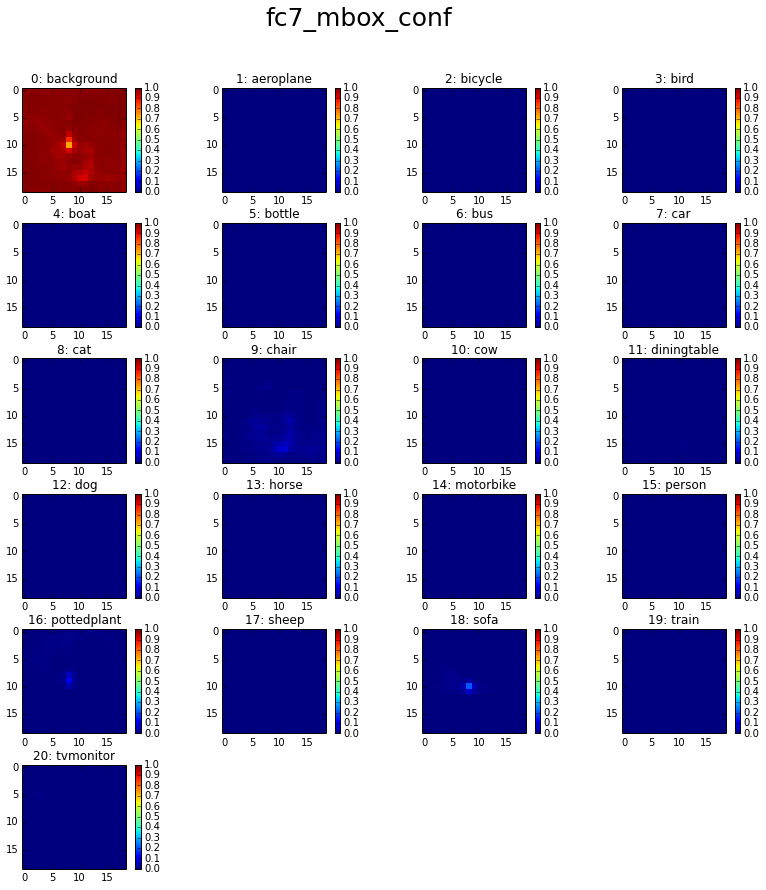

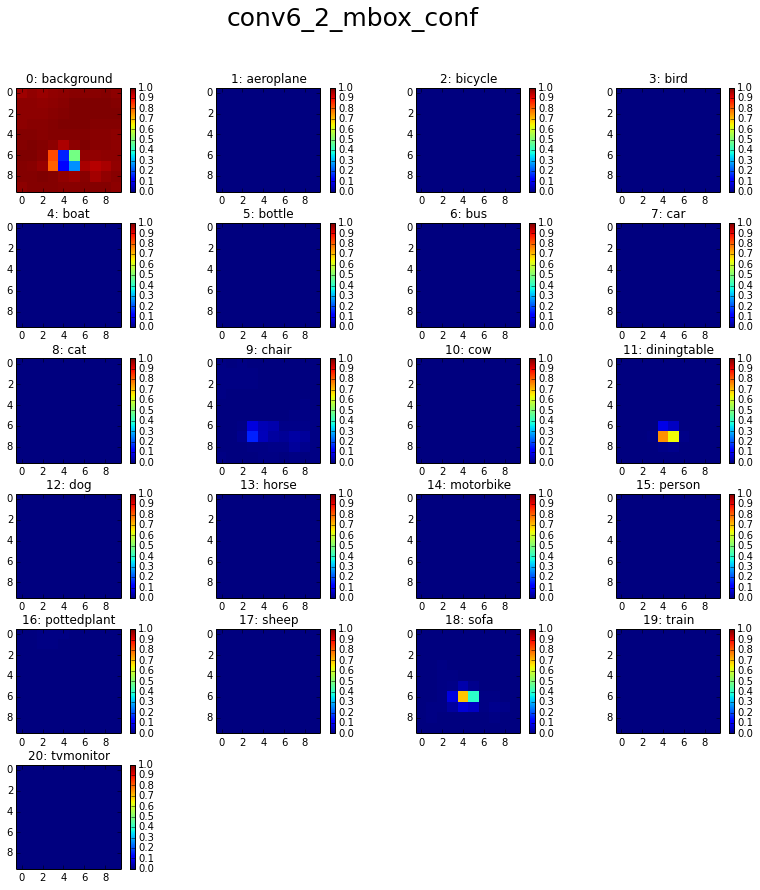

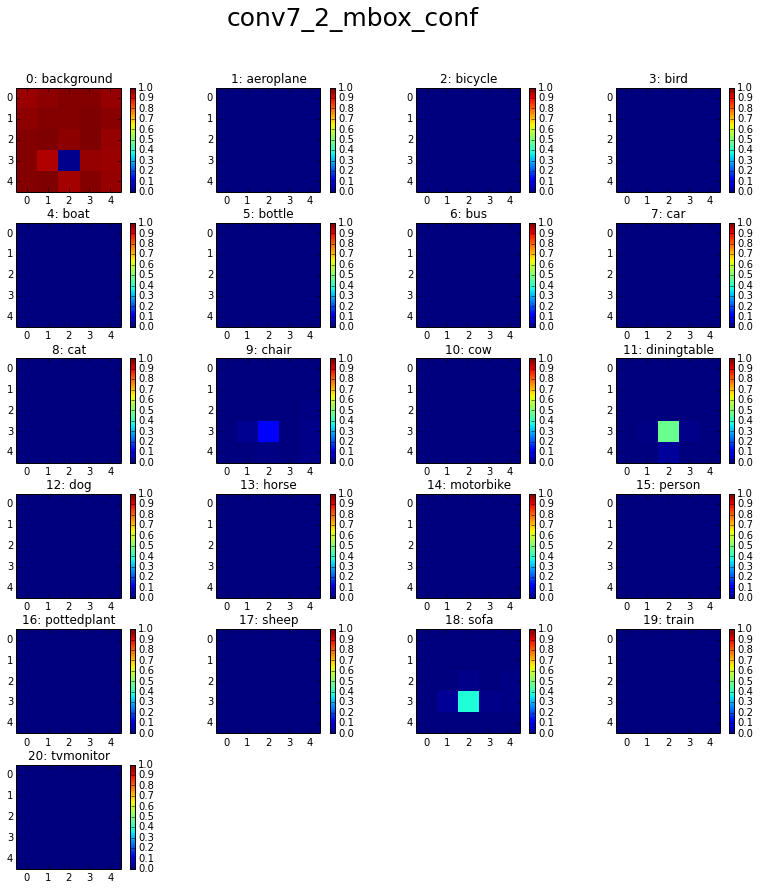

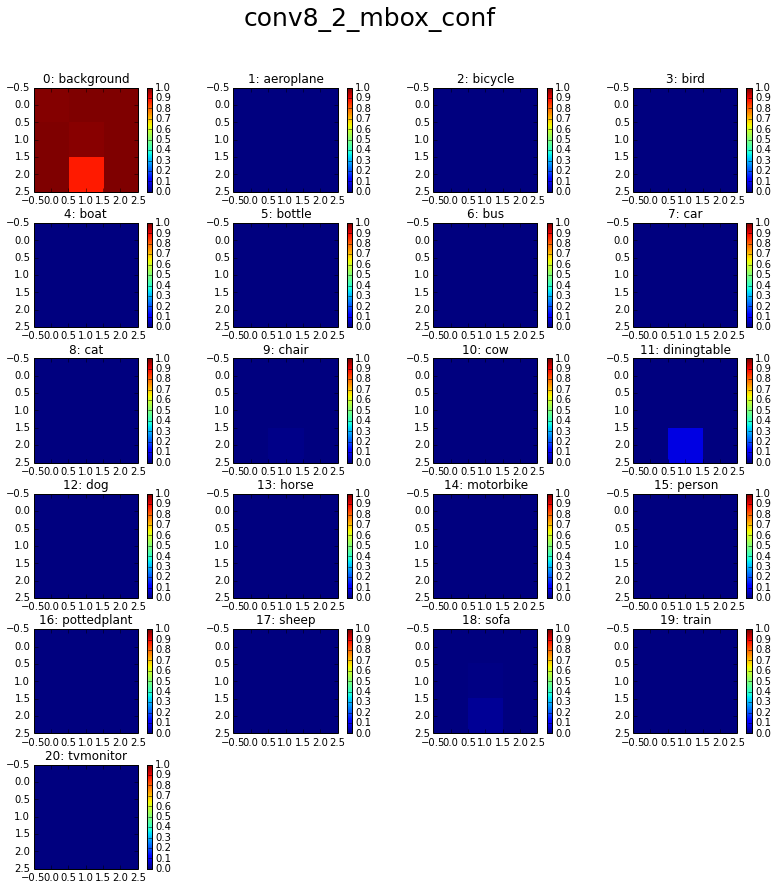

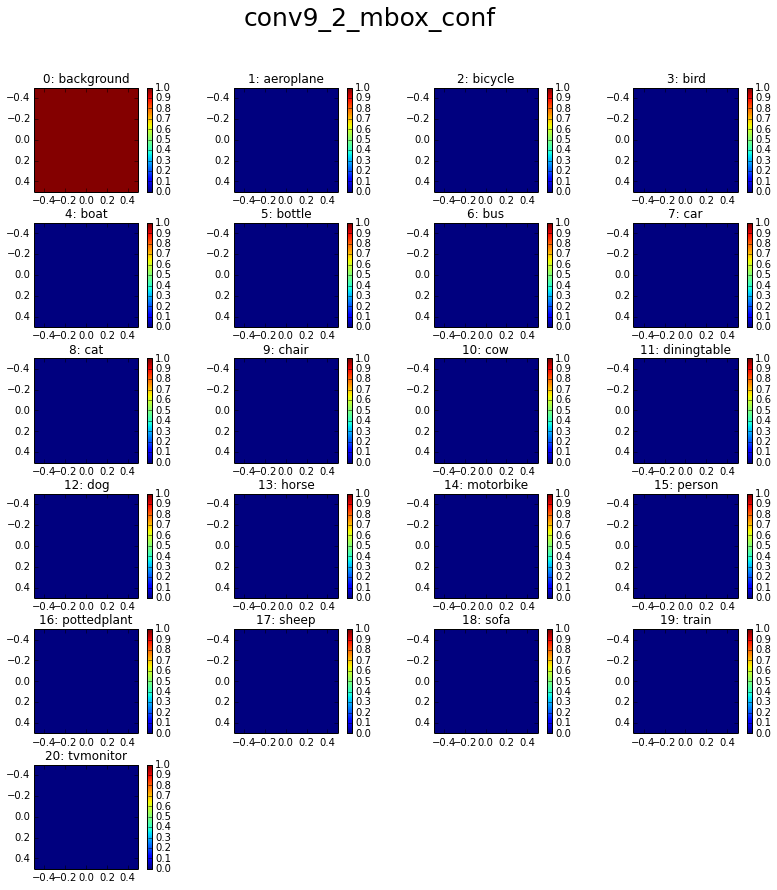

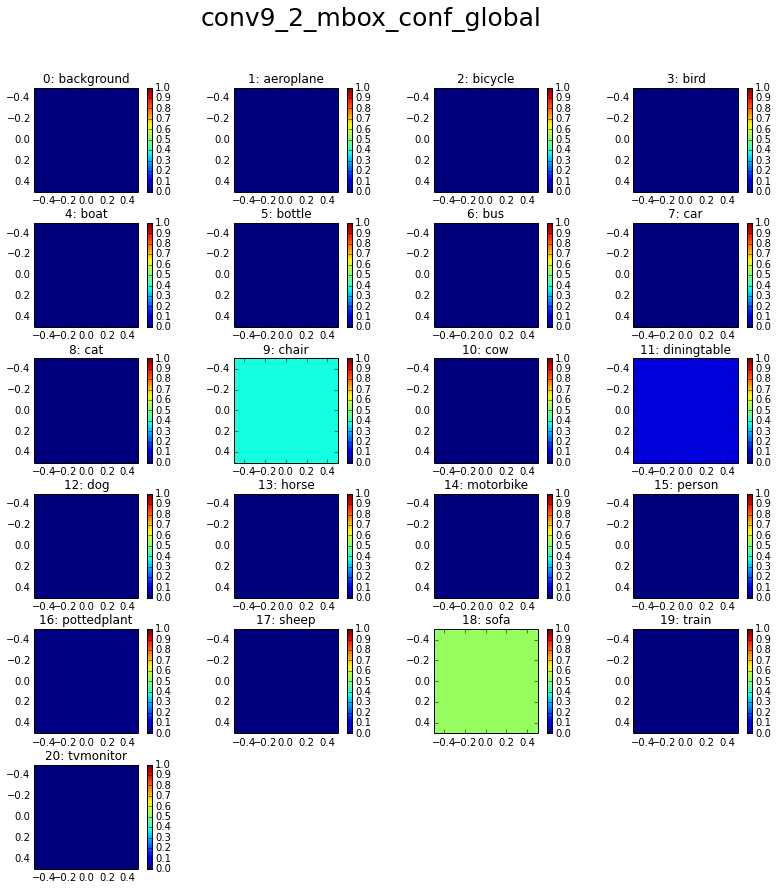

In [21]:
show_score_maps(4)

In [22]:
plt.close('all')

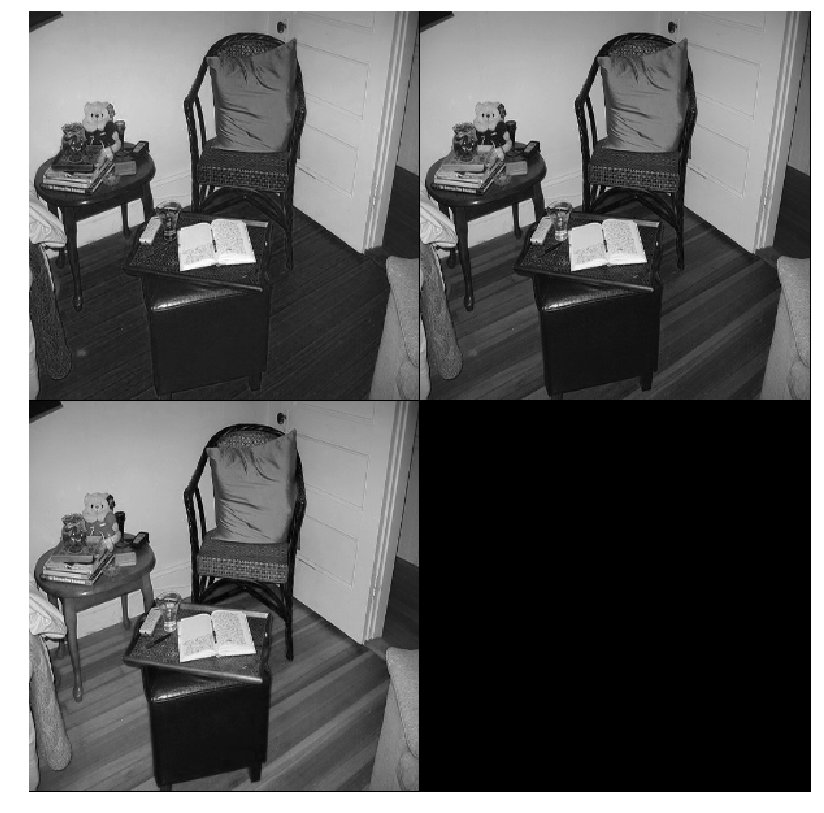

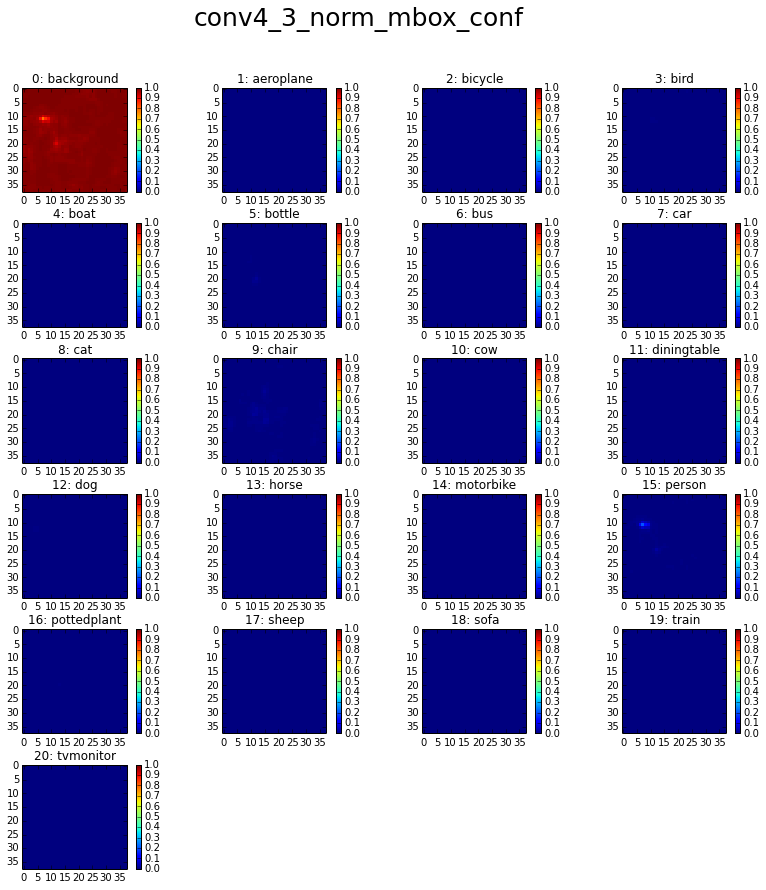

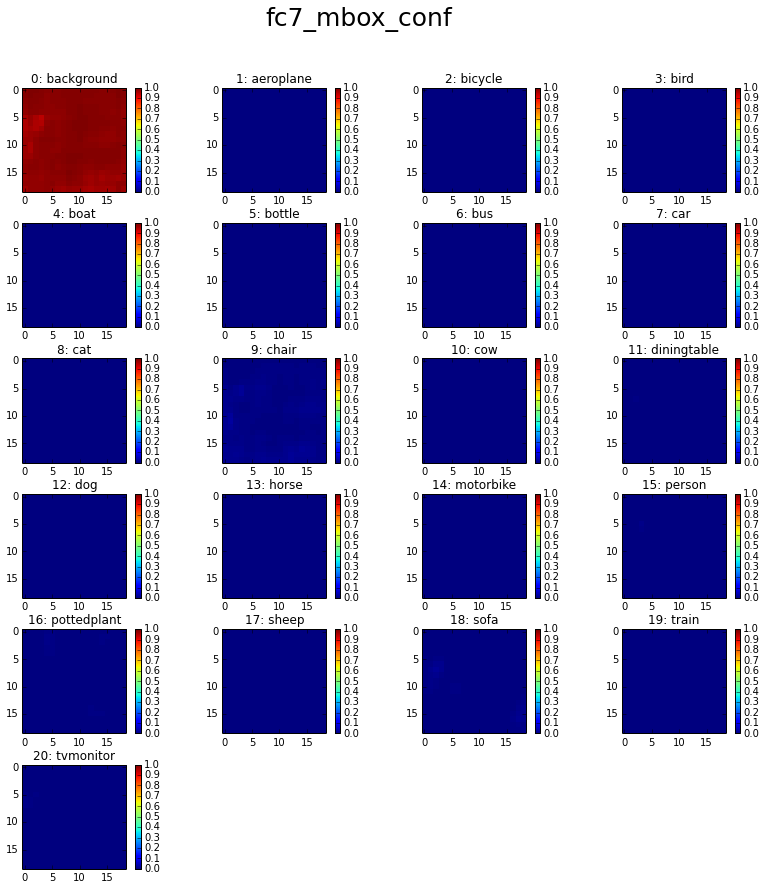

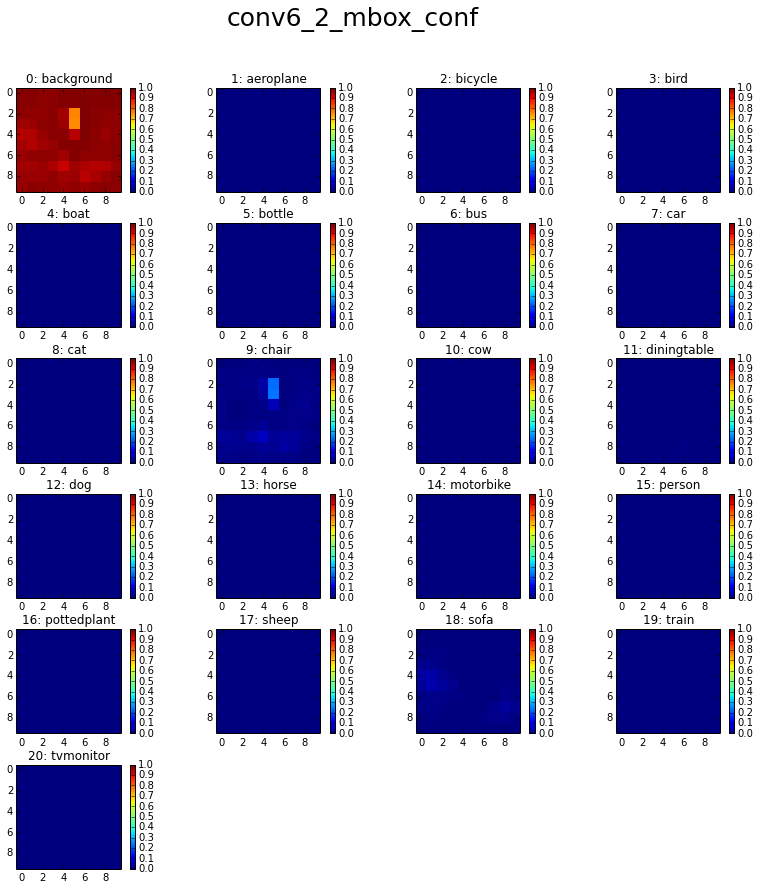

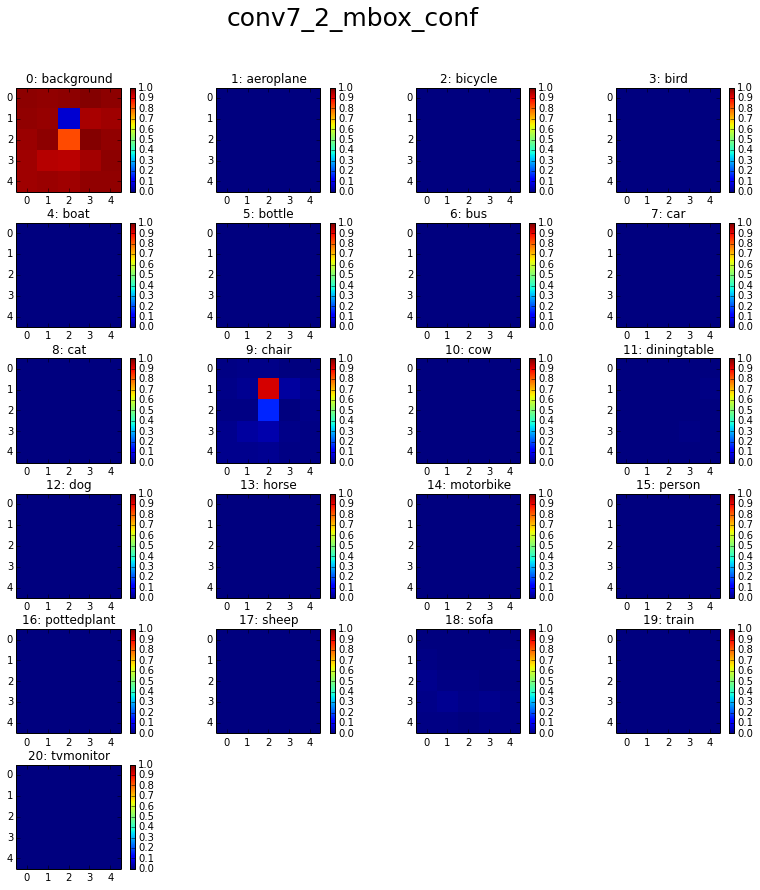

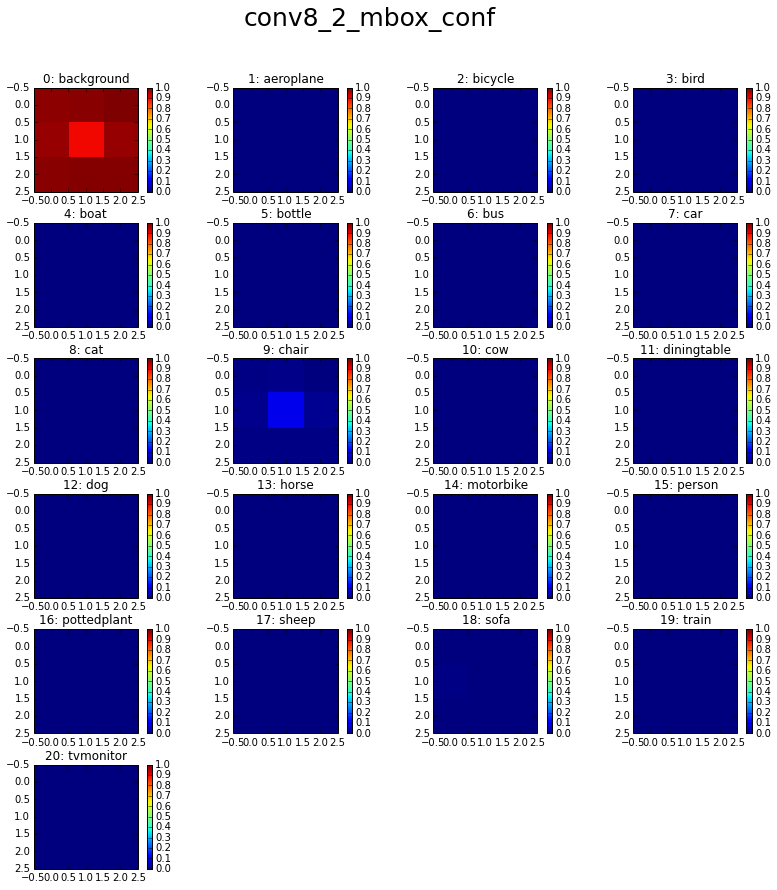

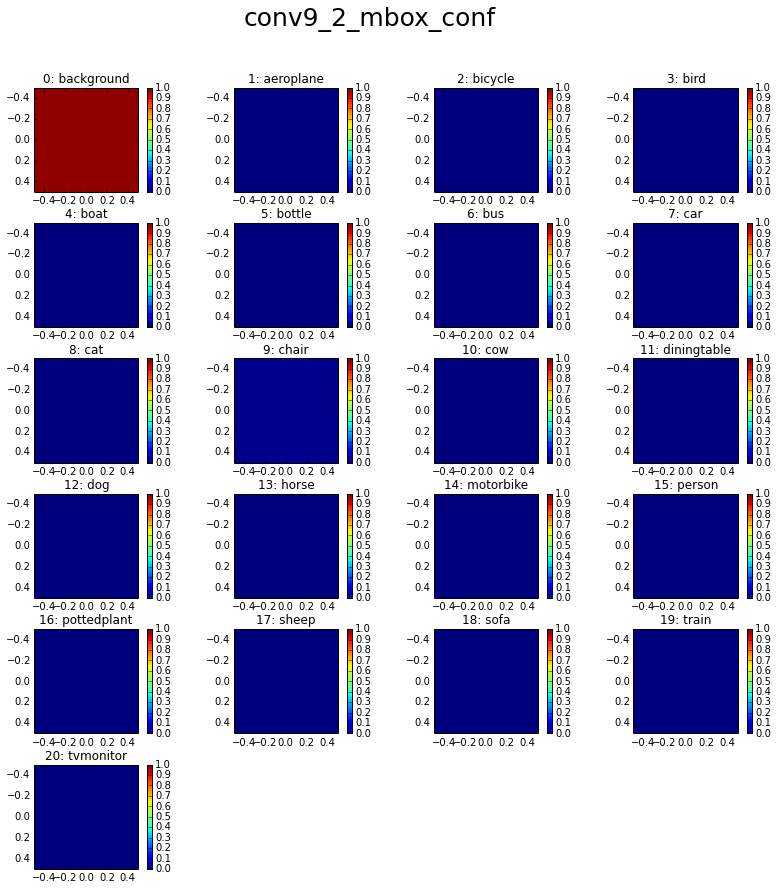

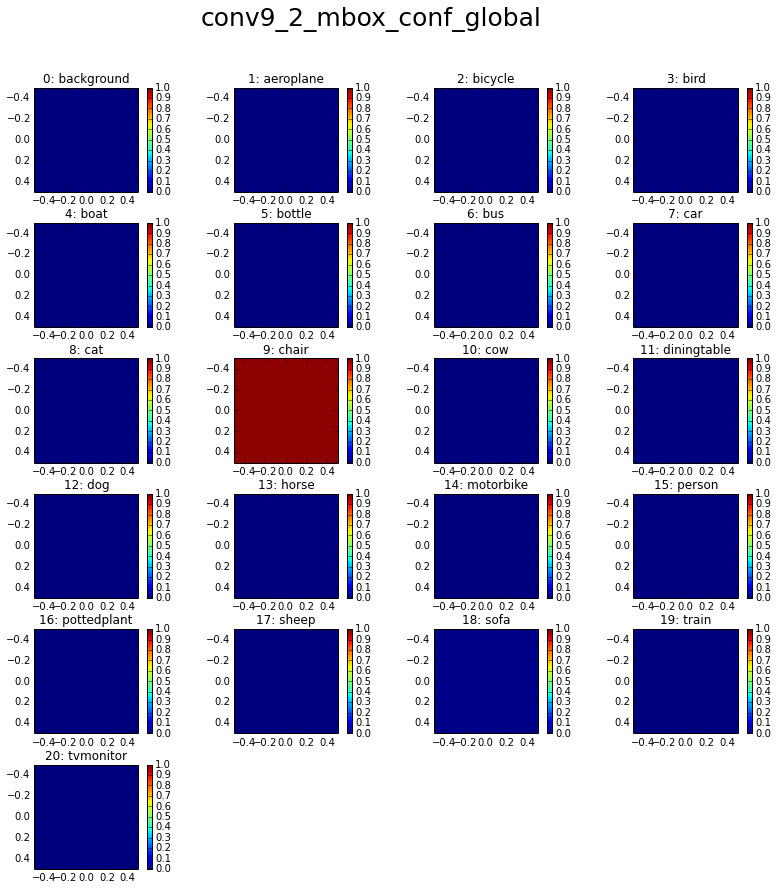

In [23]:
show_score_maps(5)

In [24]:
plt.close('all')

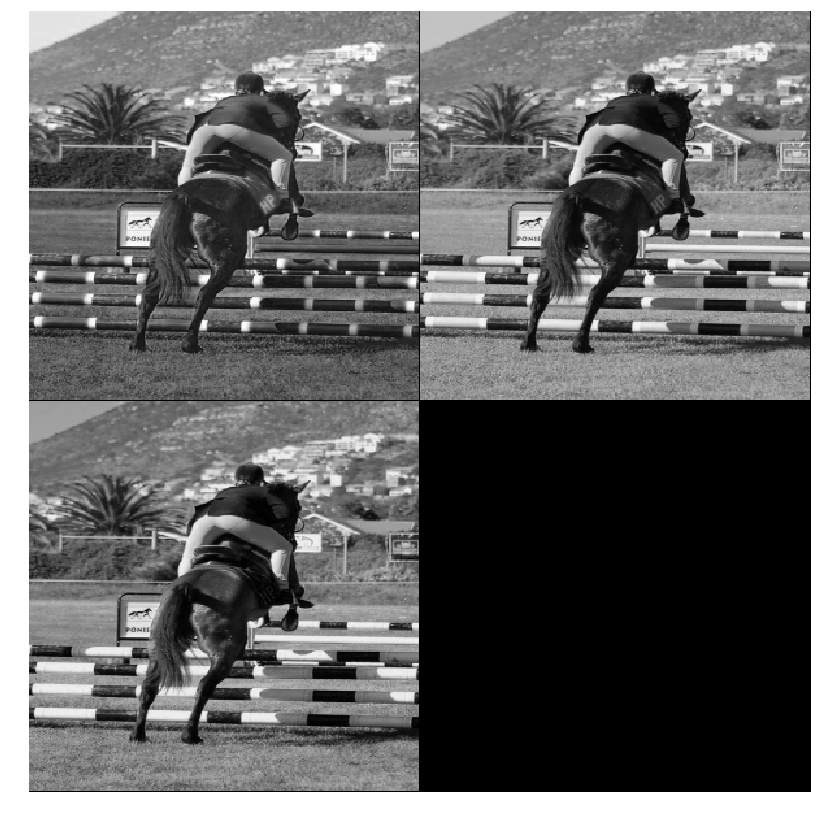

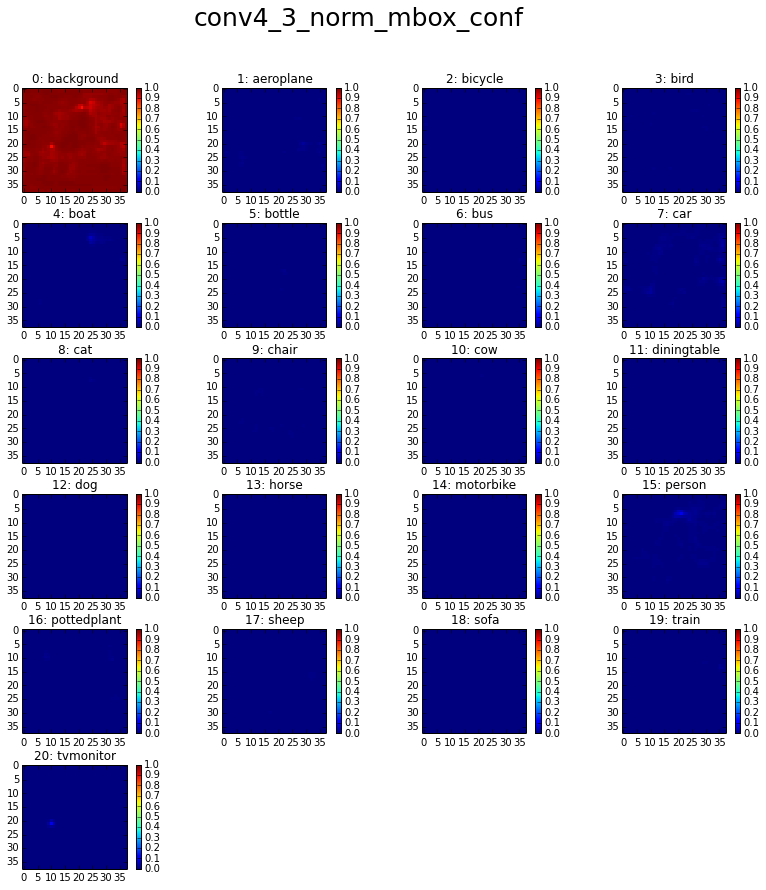

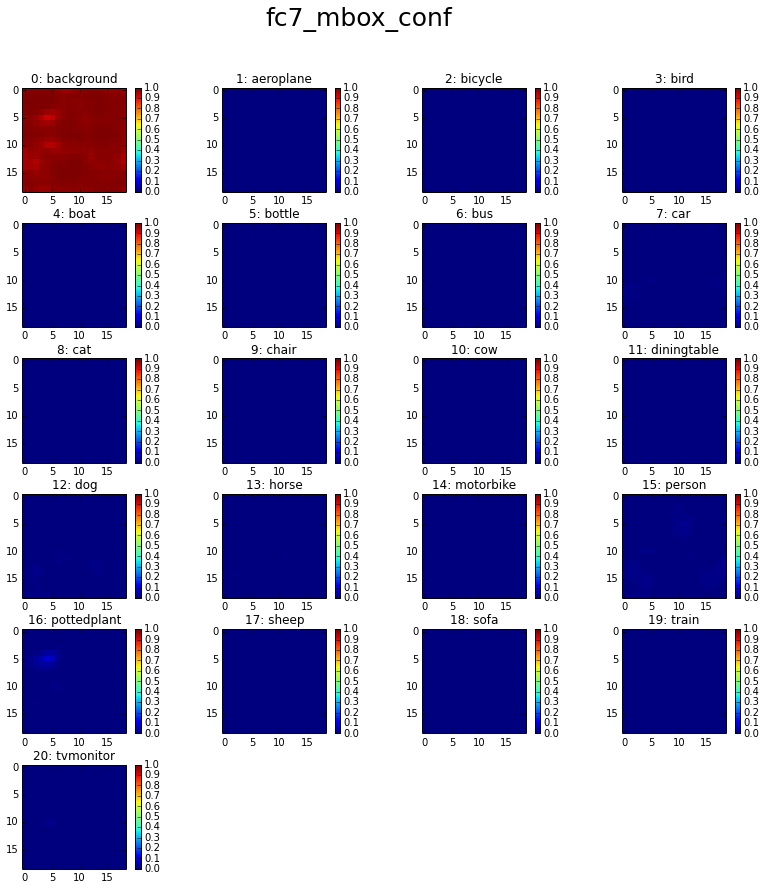

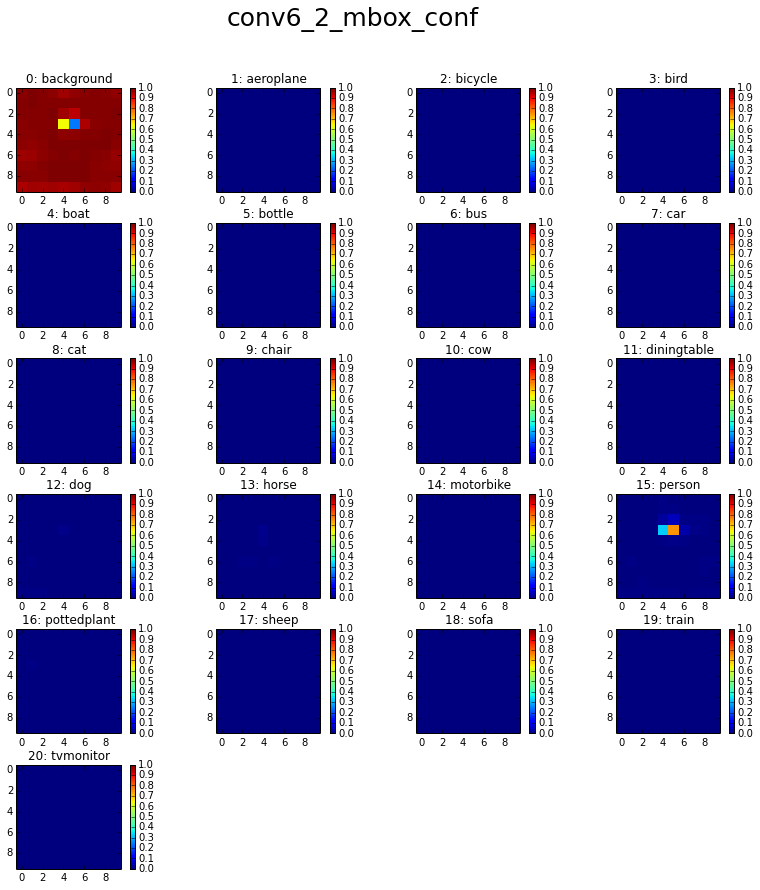

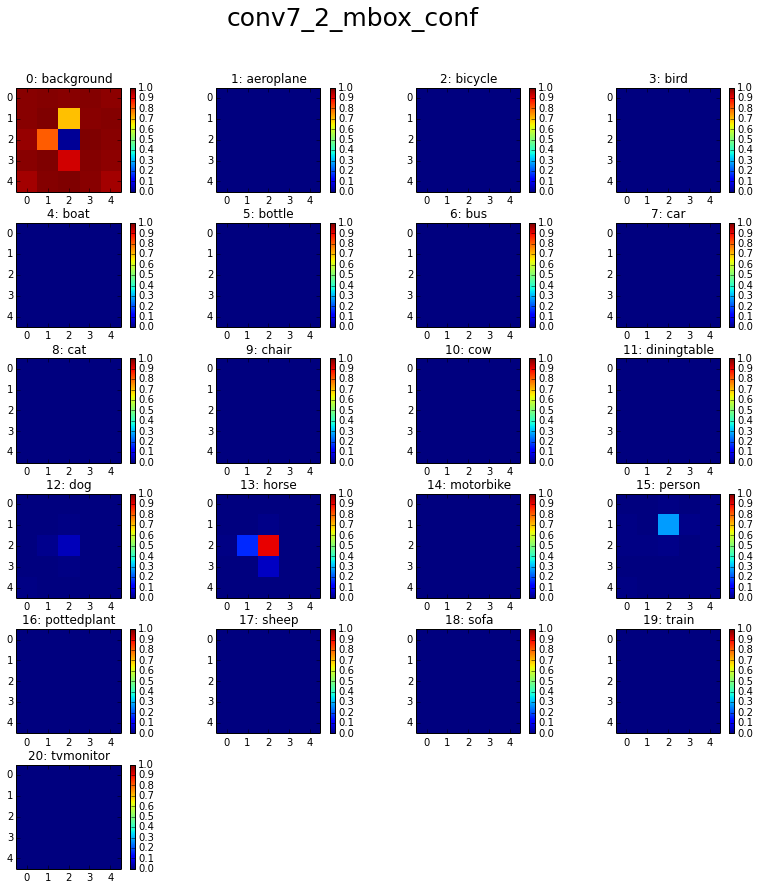

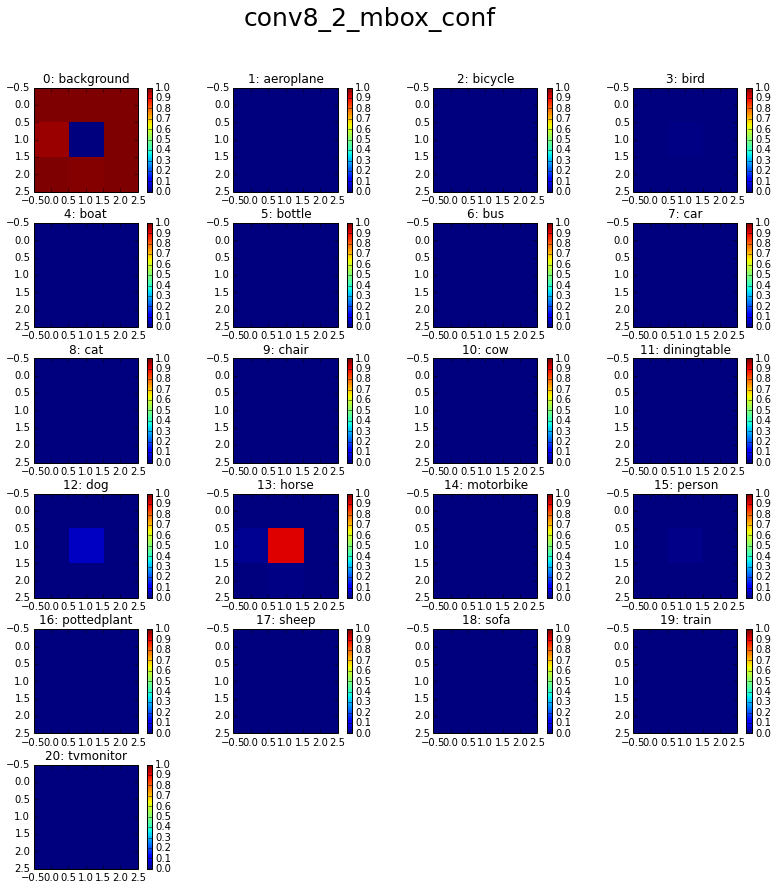

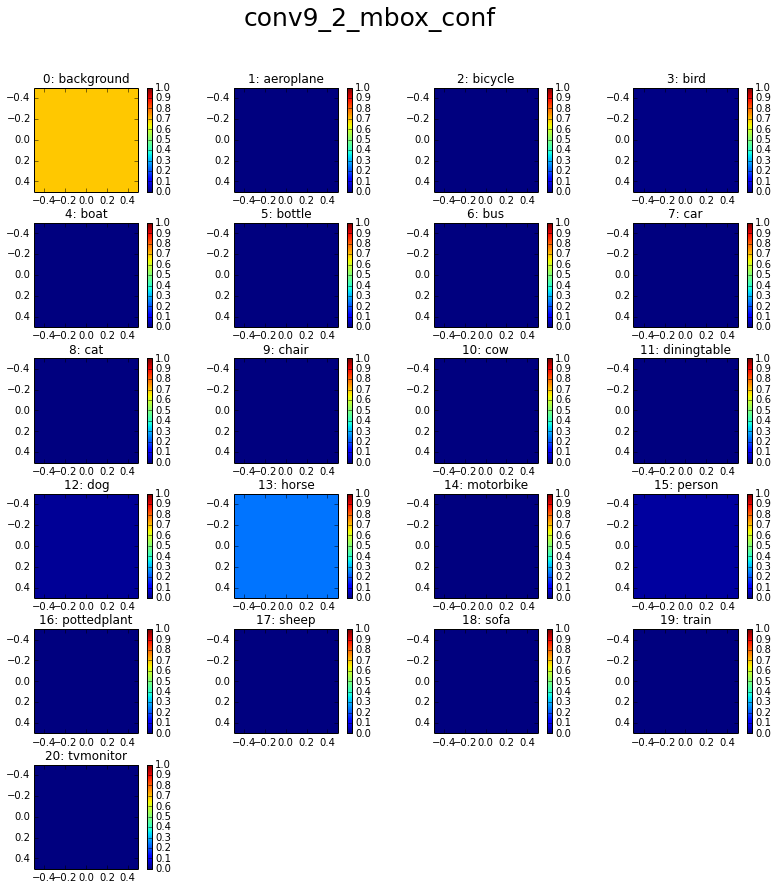

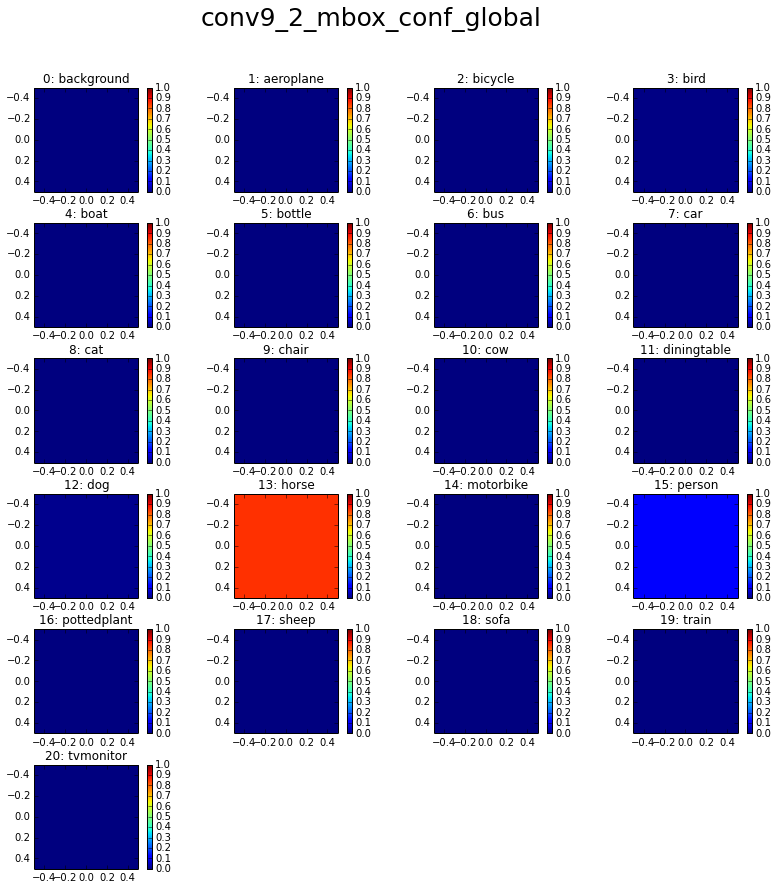

In [25]:
show_score_maps(6)

In [26]:
plt.close('all')

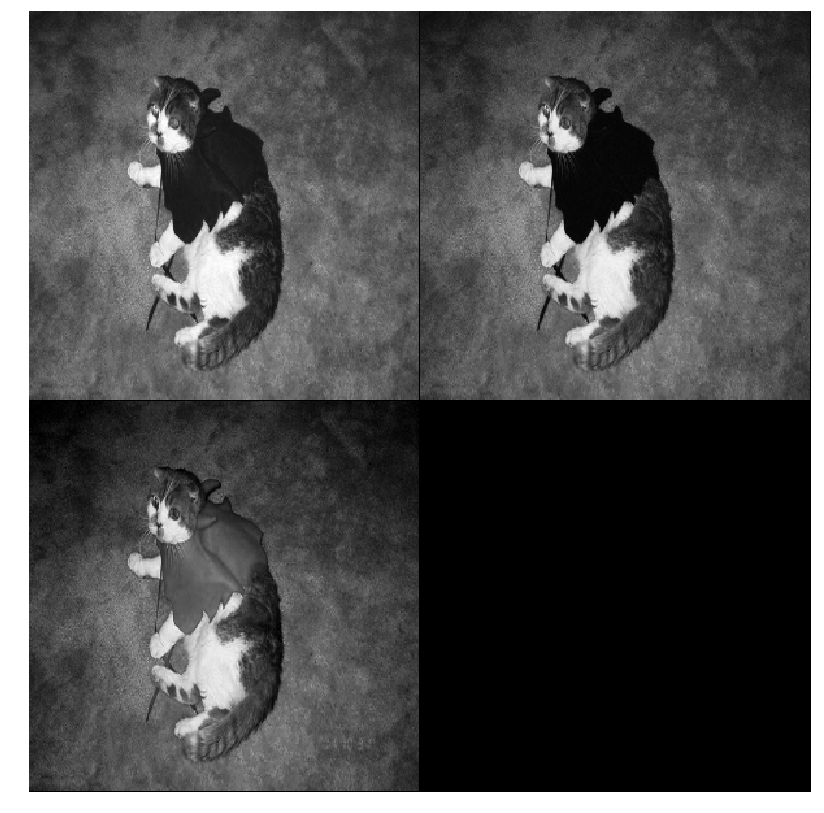

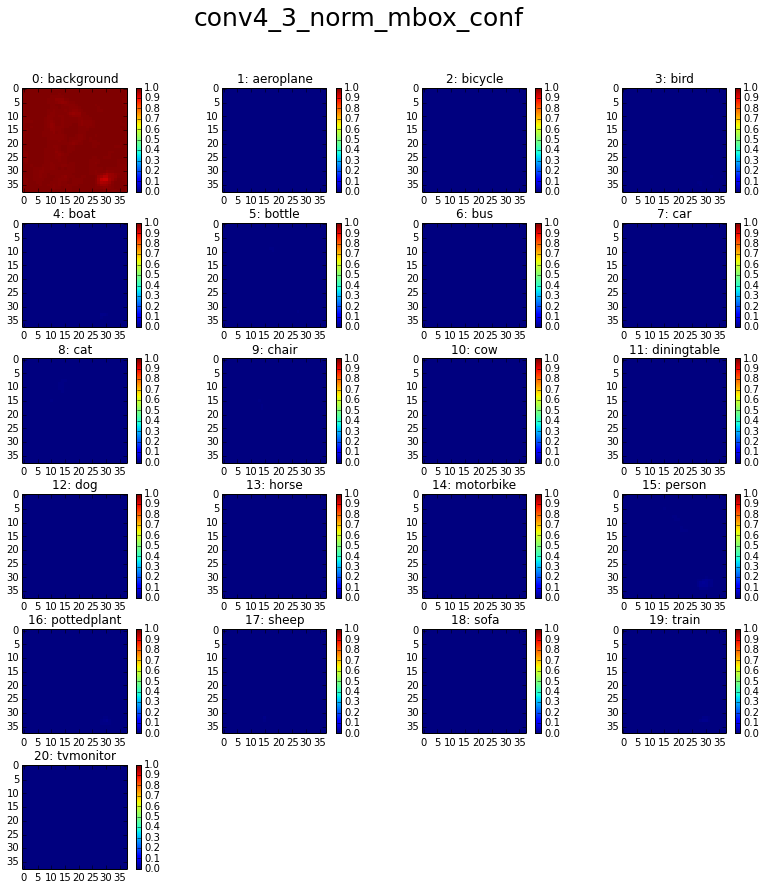

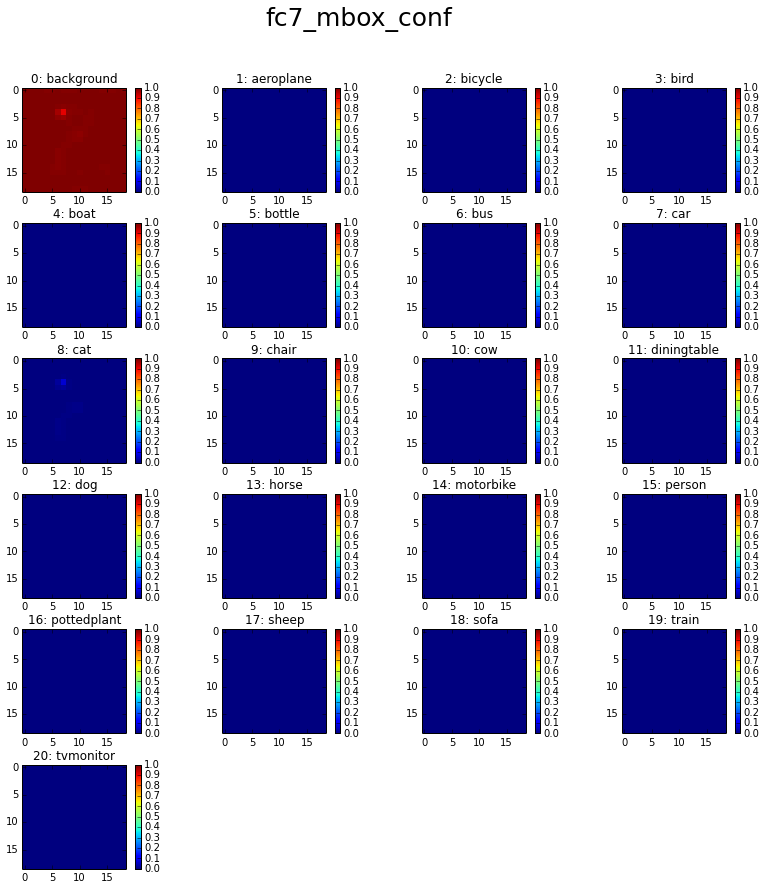

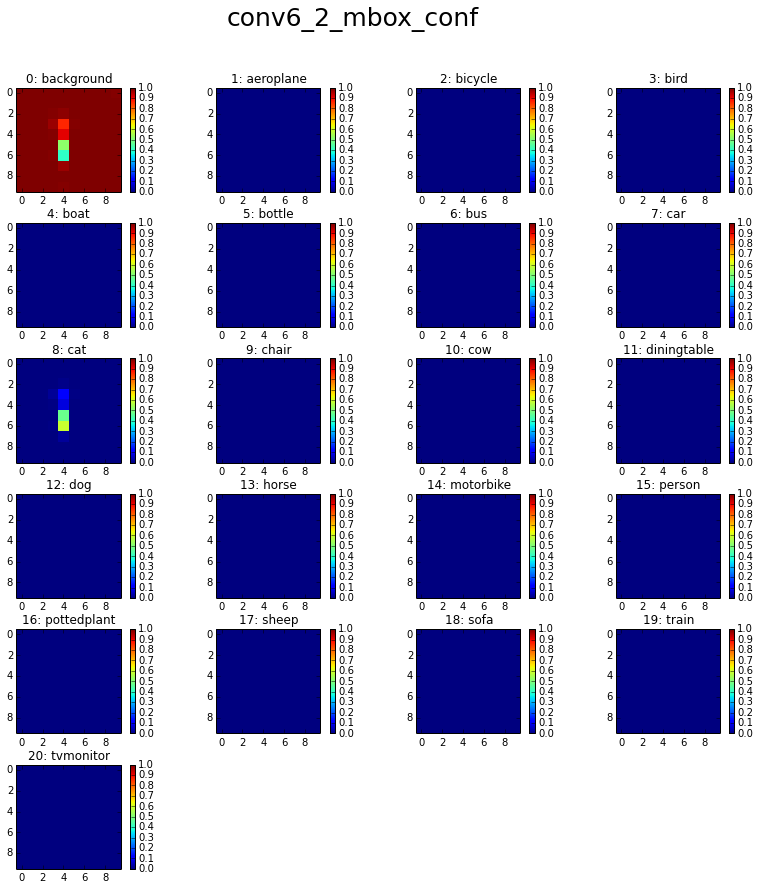

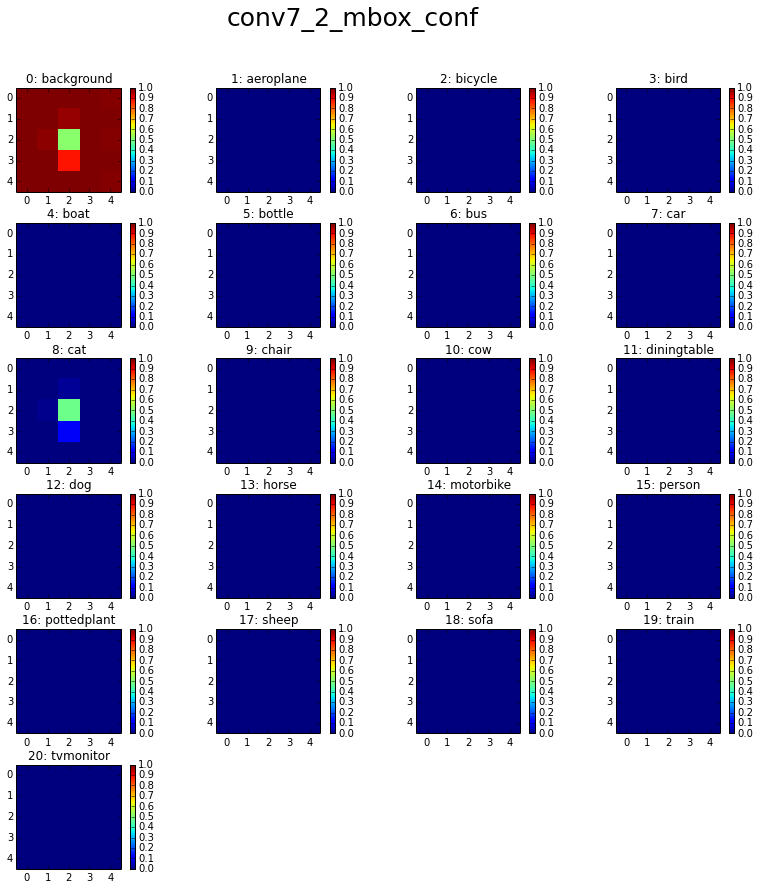

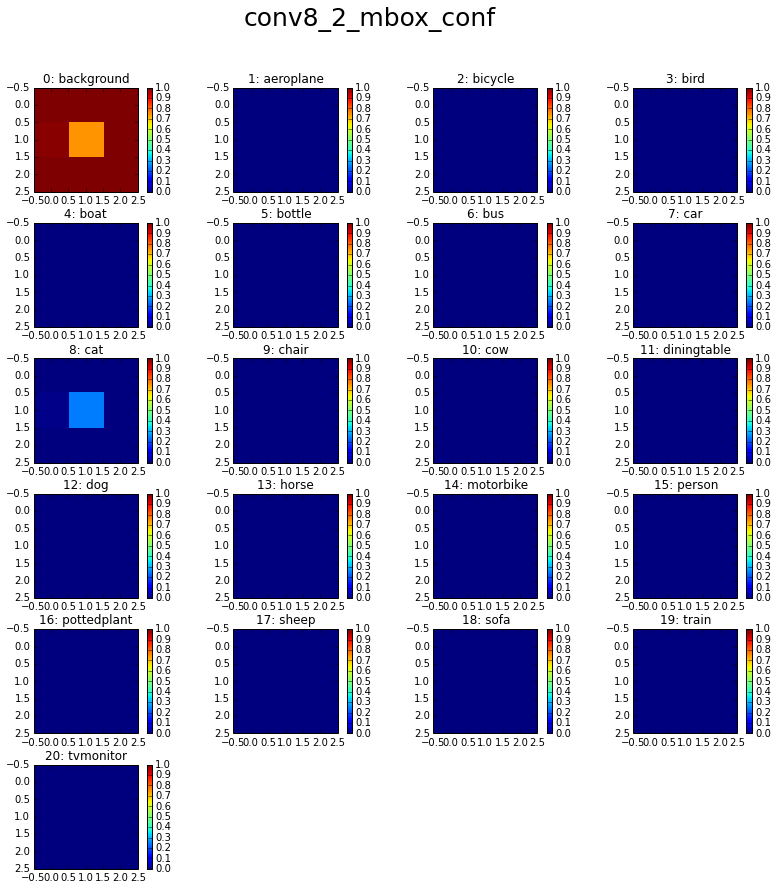

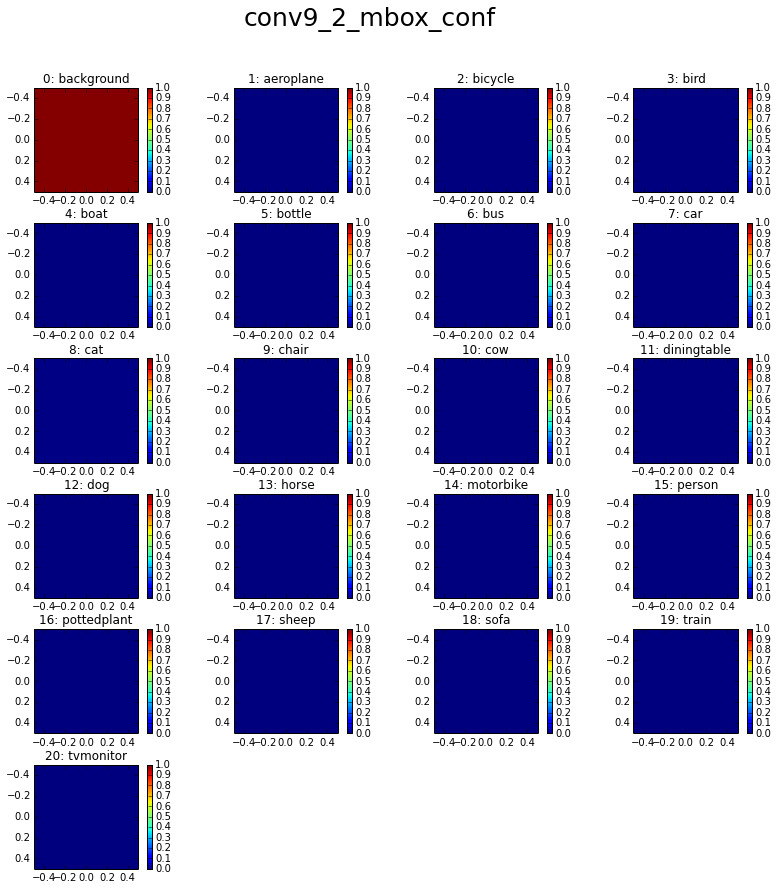

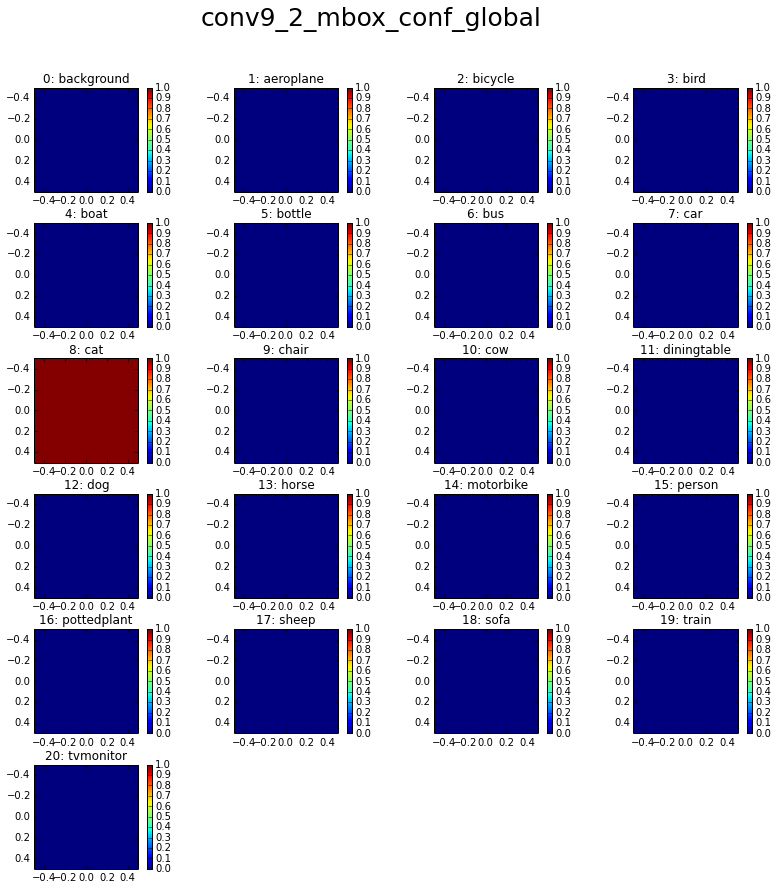

In [27]:
show_score_maps(7)

In [28]:
plt.close('all')

In [ ]:
show_score_maps(8)

In [ ]:
show_score_maps(9)

In [ ]:
show_score_maps(10)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(11)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(12)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(13)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(14)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(15)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(16)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(17)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(18)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(19)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(20)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(21)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(22)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(23)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(24)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(25)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(26)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(27)

In [ ]:
plt.close('all')

In [ ]:
show_score_maps(28)